In [1]:

import os, saspy, itertools, sys
import seaborn as sns
from tabulate import tabulate
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
today = datetime.today().strftime("%Y-%m-%d")
# now = datetime.now()

#Stats Import
from scipy.stats import wilcoxon 
from scipy.stats import shapiro 
from scipy.stats import kstest
# from numpy.random import seed
# from numpy.random import math

import pingouin as pg
from pingouin import pairwise_ttests, pairwise_tukey, pairwise_gameshowell
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
# from scipy import stats # Might need as is for ttest proportiality z or tdist
import statsmodels.api as sm
from bioinfokit.analys import stat
from statsmodels.formula.api import ols
from scipy.stats import wilcoxon
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu


import io
from io import BytesIO
import base64


from operator import concat

# sys.path.append(os.path.join(sys.path[0],'C:\Junk\lamb_consulting'))
sys.path.append(os.path.join(sys.path[0],'U:\lamb_consulting'))


# import cox, means, regressions

from lamb_consulting import *

from lamb_consulting.means import means_desc, means_desc_class, aov
from lamb_consulting.freqs import freqs, chi_contingency, chi_oneway
from lamb_consulting.export import export_to_Excel
# from lamb_consulting.regressions import ols, regression_plot
from lamb_consulting.cox import cox
from lamb_consulting.kaplan_meier import km,km_plots


# For figure image to base 64 writing

def fig_to_base64(fig):
    img = io.BytesIO()
    fig.savefig(img, format='png',
                bbox_inches='tight')
    img.seek(0)

    return base64.b64encode(img.getvalue())


tpath = "U://Leach//Schnauzers_20230406//" 
output_path = tpath + "//output//"
fn="StdSchStats"
extension='.xlsx'
file = tpath+fn+extension
file
sch = pd.read_excel((file), sheet_name='Echo')

sch.columns= sch.columns.str.lower()

sch.reset_index(inplace=True)
sch = sch.rename(columns = {'index':'my_id'})

sch_col_l = sch.columns.tolist()

sch_col_l

drop_from_all_list = ['my_id', 'name', 'id', 'doe', 'dob', 'genotype', 'mitral_regurg', 'tricuspid_regur',
 'pulmonic_regurg', 'aortic_regurg', 'rhythm','conduction_block', 'sex']

# create new list using list comprehension
iv_cont_list = [i for i in sch_col_l if i not in drop_from_all_list]

iv_cat_list = ['sex', 'genotype']

cat_list = ['genotype', 'mitral_regurg', 'tricuspid_regur', 'pulmonic_regurg', 'aortic_regurg', 'rhythm','conduction_block', 'sex']


print(iv_cont_list)
print(iv_cat_list)
print(cat_list)

# h_nan_drop = h_nan_drop.rename(columns = {'home_club':'club_dup'}).reset_index()
# h_nan_drop = h_nan_drop.drop(columns=['index'])
# ha_nan.to_excel("_ha_nan.xlsx")

    

['age', 'weight', 'bsa', 'ntprobnp', 'ctni', 'aa_l', 'av_vmax', 'e_a_ratio', 'e_ea_ratio', 'ea_l', 'ea_aa_ratio', 'edv', 'edvi', 'ef', 'epss', 'esv', 'esvi', 'fs', 'ivrt', 'lvl', 'sphericity_index', 'ivsd', 'la_lax', 'nla_lax', 'la_sax', 'ao_sax', 'la_ao_ratio', 'lvidd', 'nlvidd', 'lvids', 'nlvids', 'lvpwd', 'mv_a', 'mv_e', 'pv_vmax', 'sv', 'heart_rate', 'mea']
['sex', 'genotype']
['genotype', 'mitral_regurg', 'tricuspid_regur', 'pulmonic_regurg', 'aortic_regurg', 'rhythm', 'conduction_block', 'sex']


# Start Groupings for mean, std, and other descriptive statistics



In [2]:
m_desc_df = pd.DataFrame()
m_class_df = pd.DataFrame()

# df_90_912p5 df_912p5_1825 df_1825_3560  df_90_3560
for i in iv_cont_list:
        desc_tmp = means_desc(sch, i,"sch")
        m_desc_df = m_desc_df.append(desc_tmp)


# Deliberately changing class to desc for appending for stacking purposes
for i in iv_cat_list:
    for j in iv_cont_list:
        desc_class_tmp = means_desc_class(sch,j, i,"df")
        m_class_df = m_class_df.append(desc_class_tmp)

print("m_desc_df")
display(m_desc_df.head())
print("m_class_df")
display(m_class_df.head())

m_desc_df


,df_used,cont_var,nmiss,n,mean,median,std,min,max,p25,p75
0,sch,age,0,66.0,4.230303,3.153425,3.015425,1.000000,11.742466,2.05411,4.986301
0,sch,weight,0,66.0,17.442424,17.250000,2.263426,13.100000,23.400000,16.00000,19.075000
0,sch,bsa,0,66.0,0.678046,0.674290,0.058698,0.561266,0.826289,0.64131,0.721048
0,sch,ntprobnp,0,66.0,410.606061,418.000000,182.150730,126.000000,948.000000,294.00000,483.250000
0,sch,ctni,0,66.0,22.969697,11.000000,32.178813,4.000000,172.000000,7.25000,21.500000


m_class_df


,df_used,cat_var,level,var,nmiss,n,mean,median,std,min,max,p25,p75
0,df,sex,2,age,0,29.0,4.323193,3.128767,3.110285,1.000000,11.742466,2.479452,6.630137
1,df,sex,1,age,0,37.0,4.157497,3.230137,2.980104,1.000000,11.715068,2.038356,4.920548
0,df,sex,2,weight,0,29.0,15.955172,15.900000,1.655637,13.500000,19.700000,14.400000,17.000000
1,df,sex,1,weight,0,37.0,18.608108,18.500000,1.984856,13.100000,23.400000,17.300000,20.300000
0,df,sex,2,bsa,0,29.0,0.639386,0.638635,0.043947,0.572634,0.736714,0.597810,0.667760


# Inferential two-way ANOVA for later upon specific request

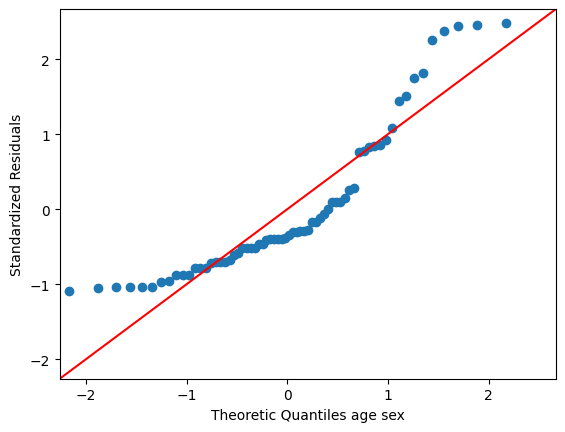

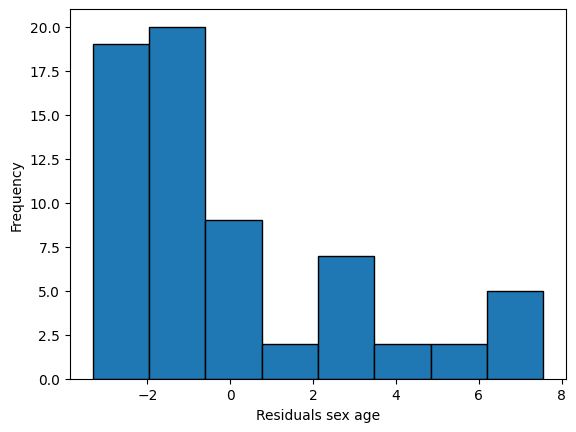

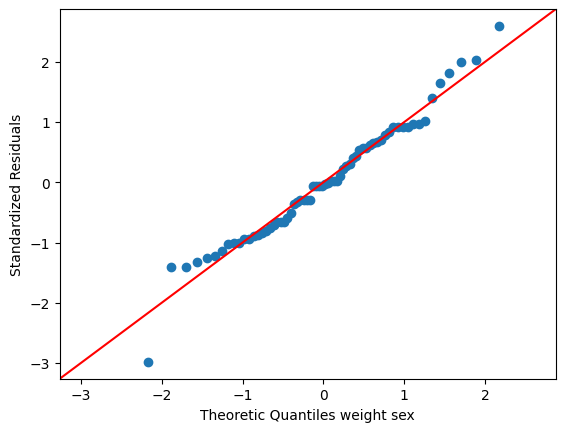

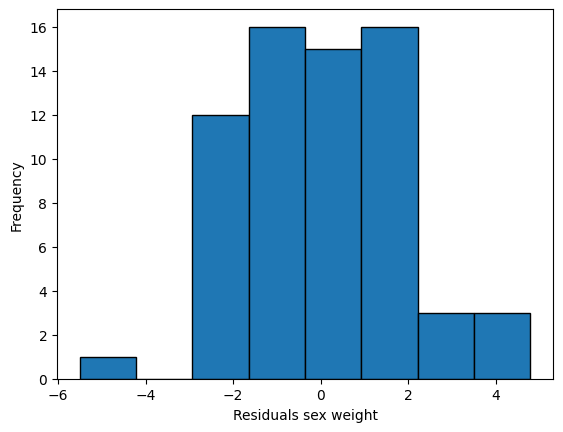

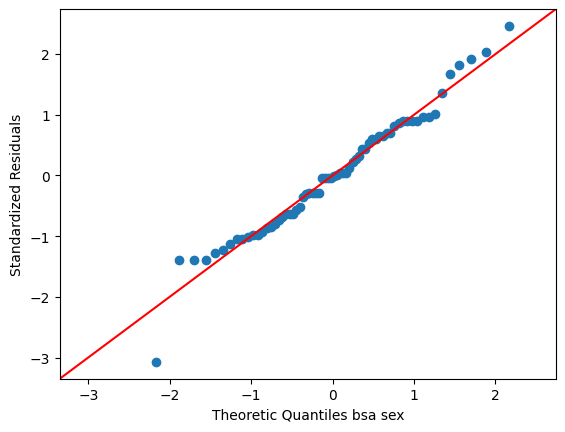

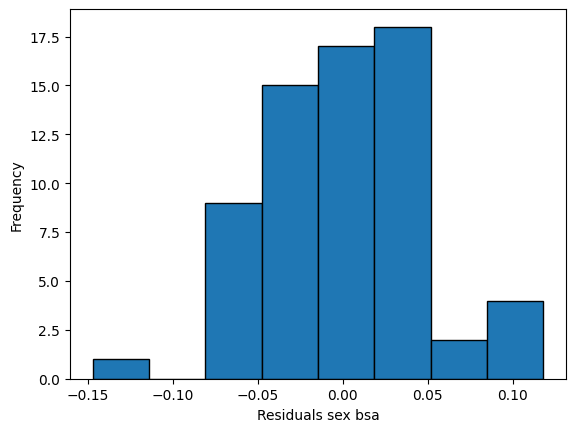

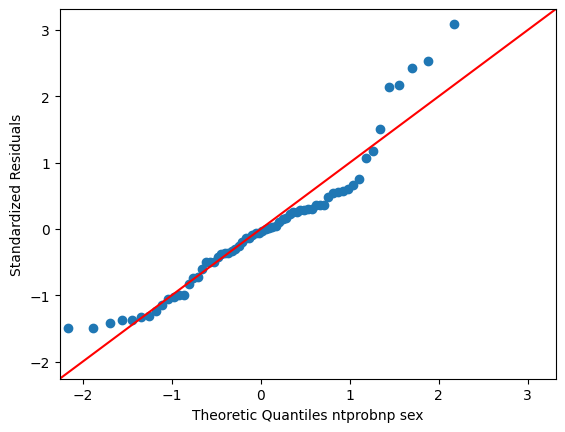

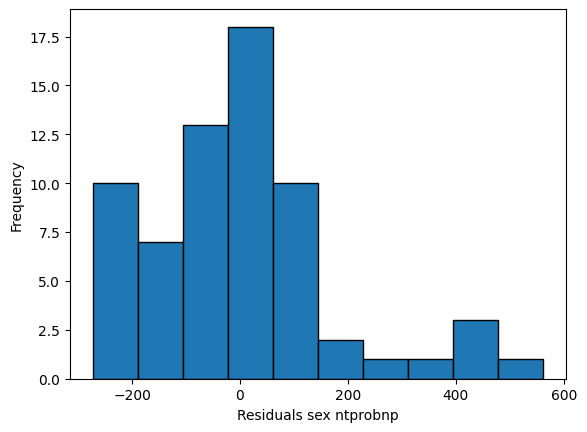

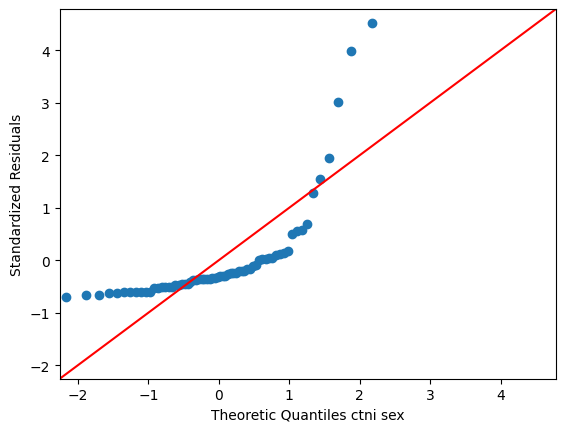

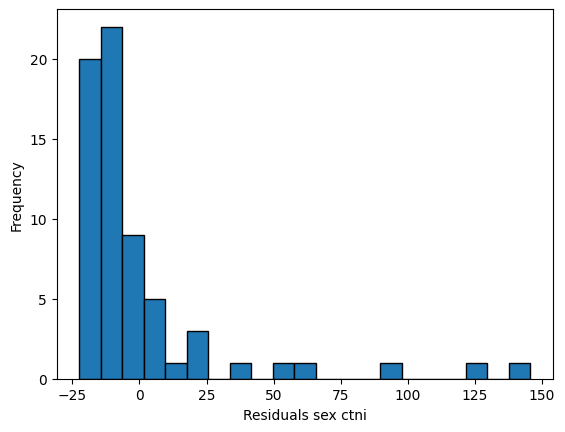

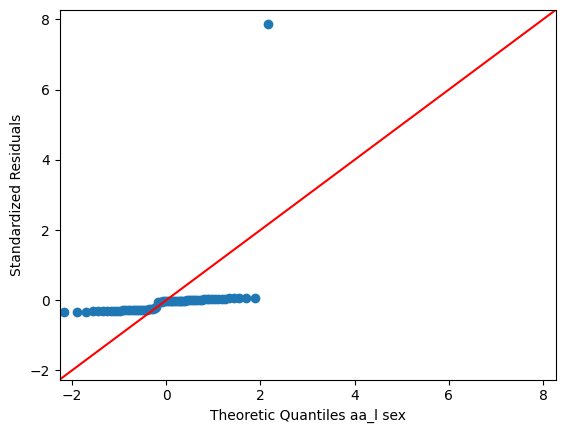

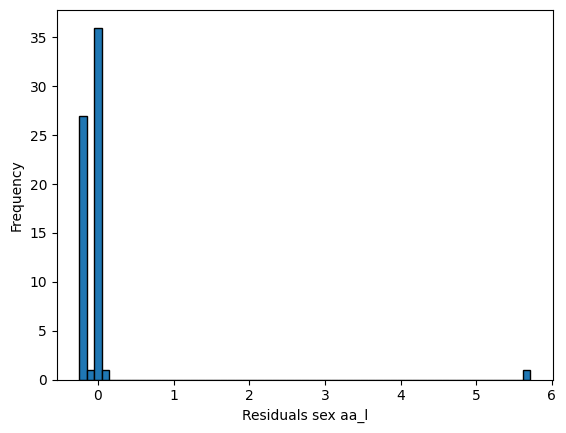

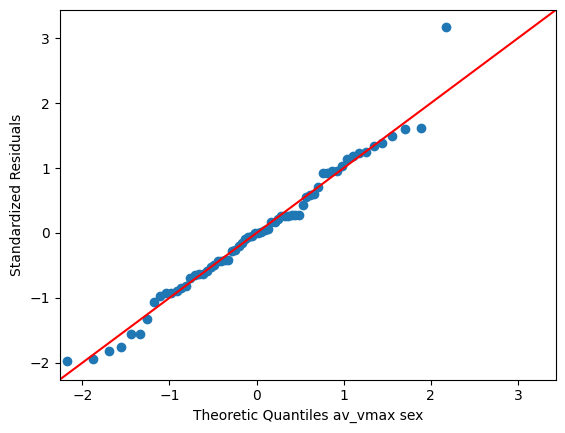

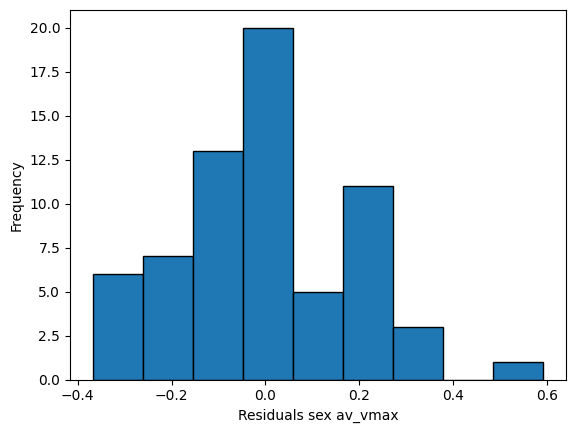

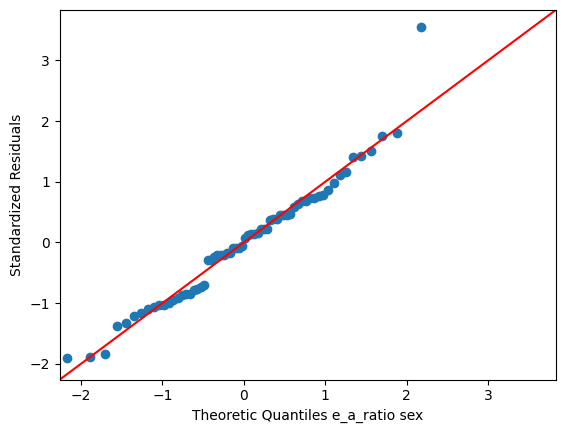

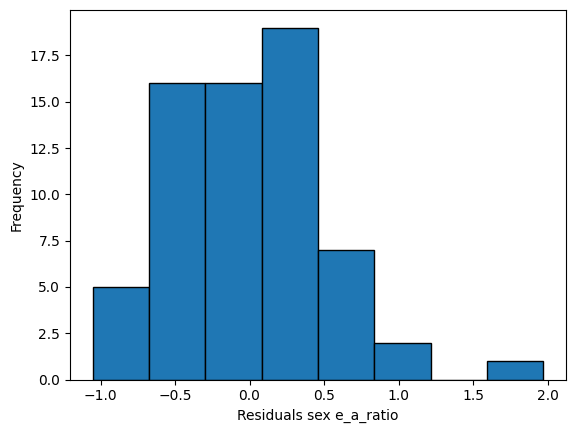

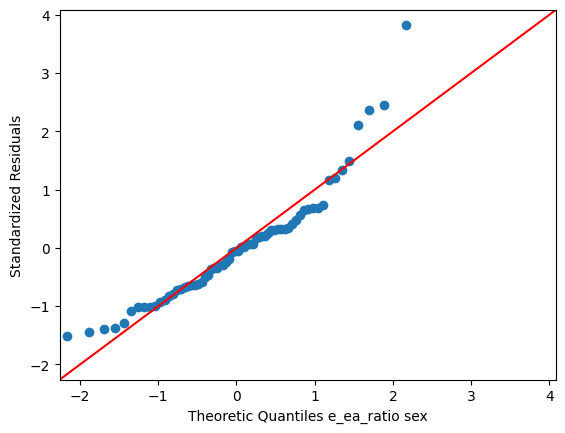

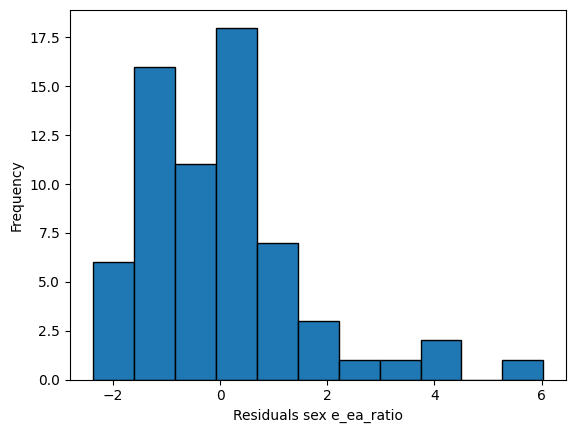

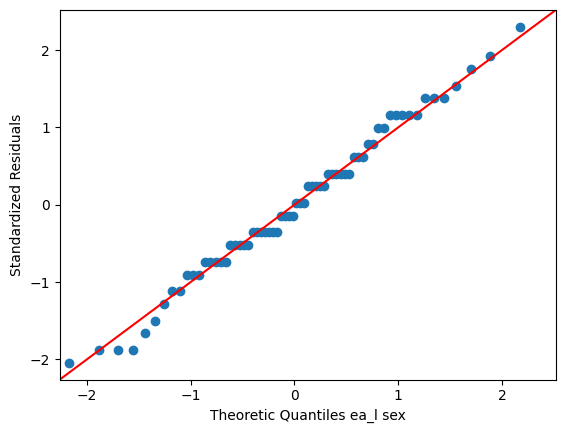

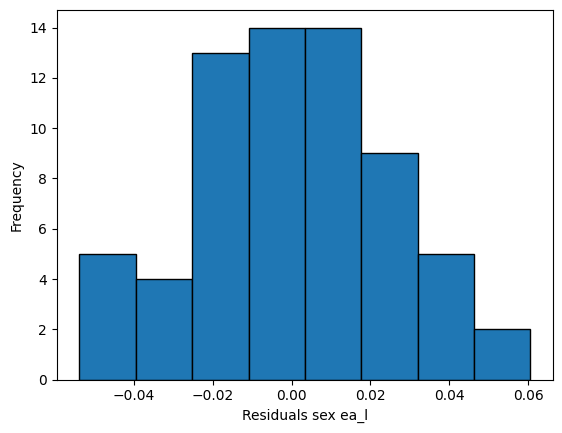

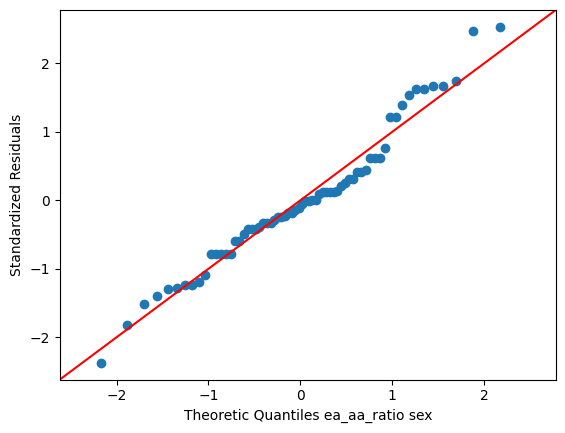

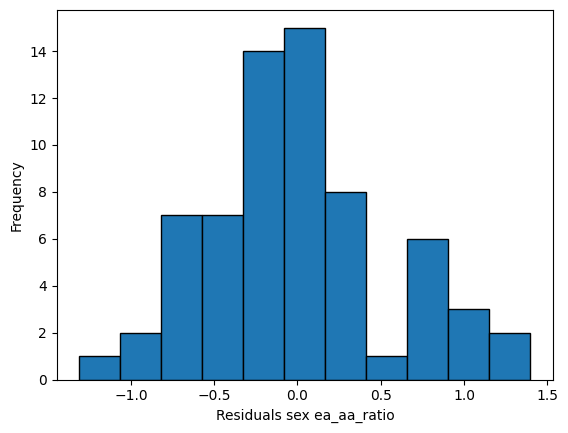

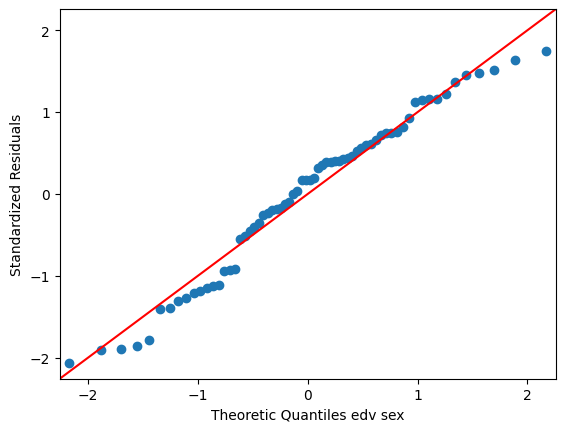

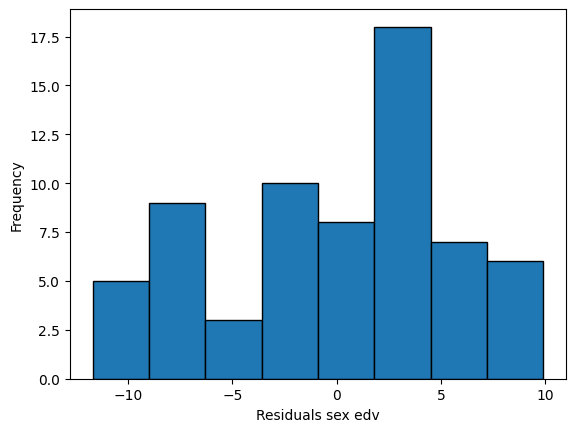

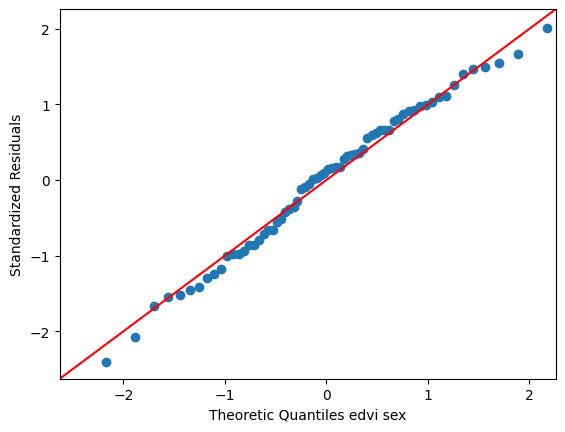

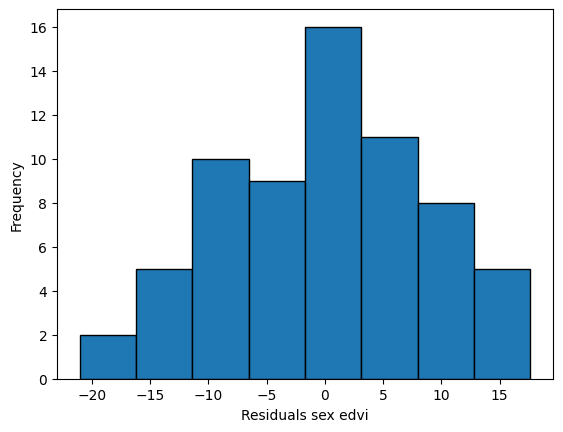

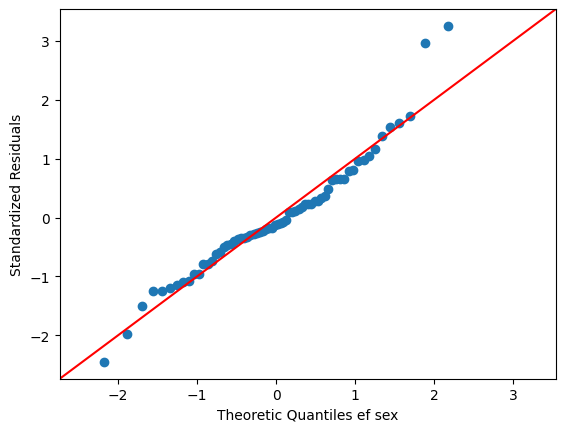

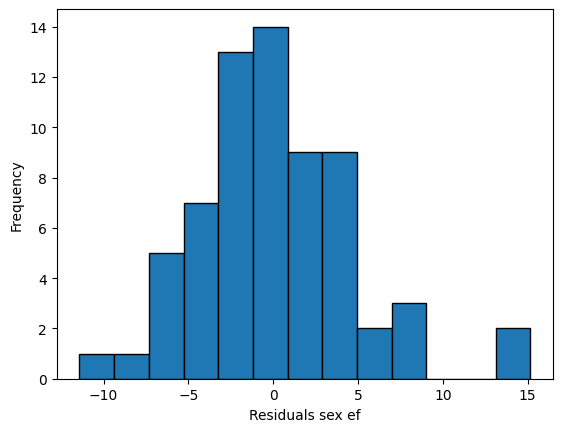

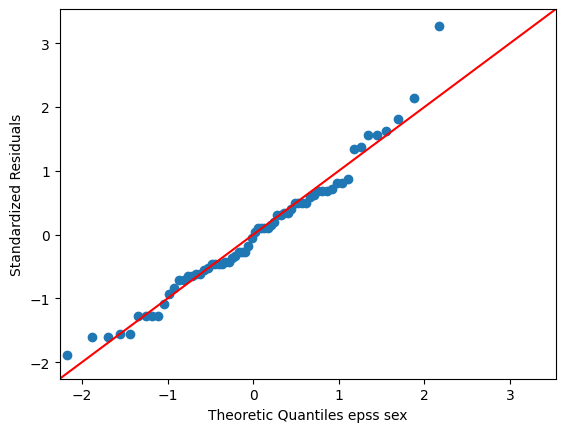

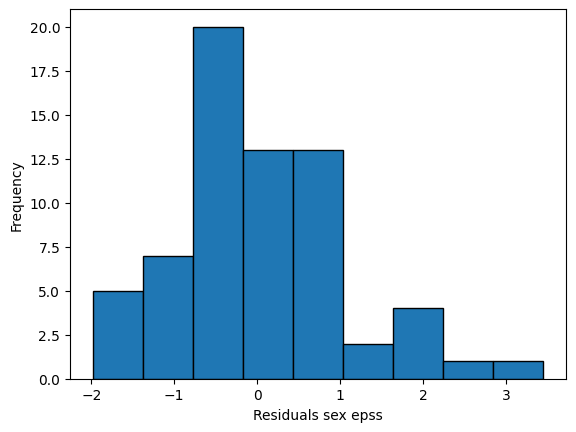

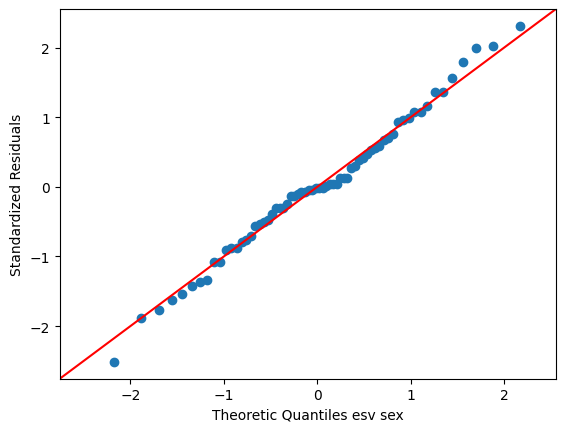

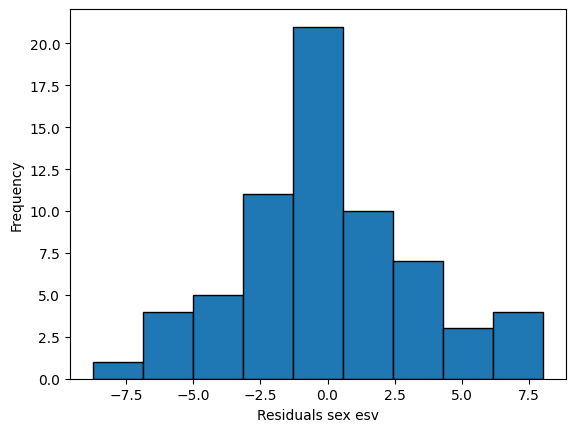

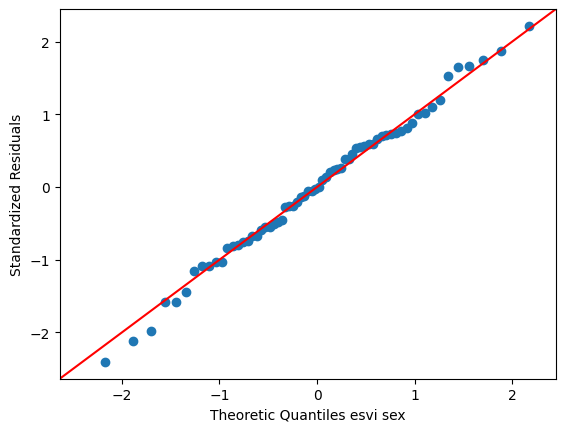

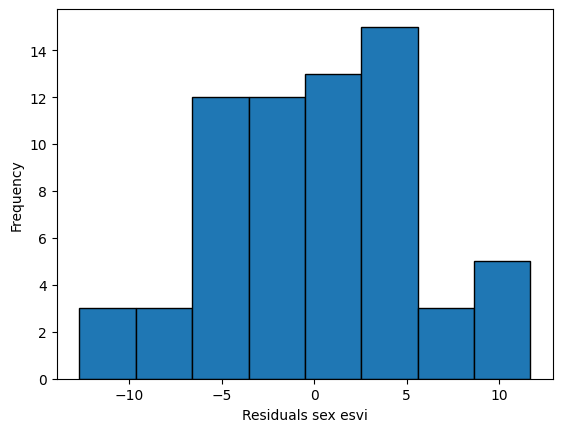

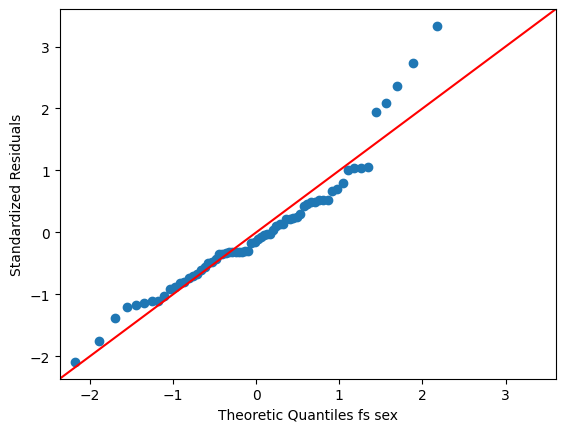

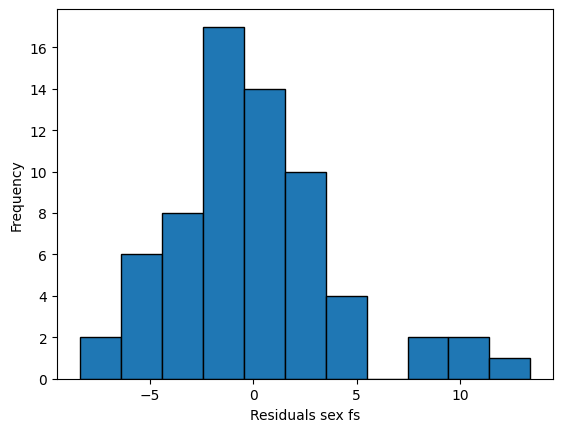

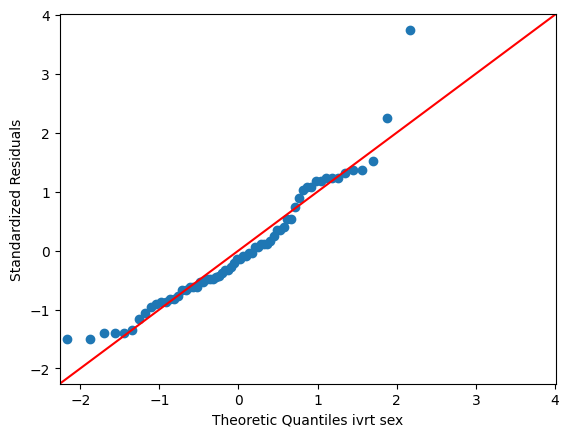

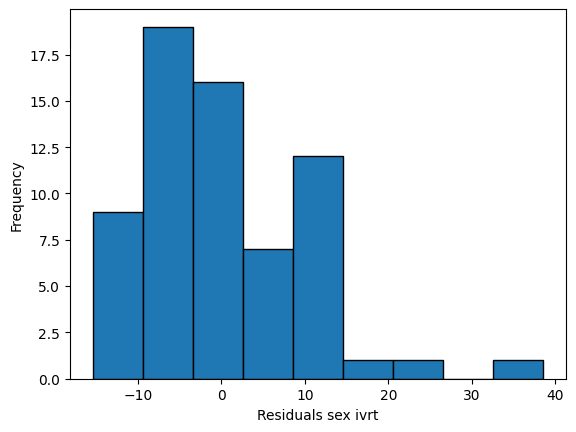

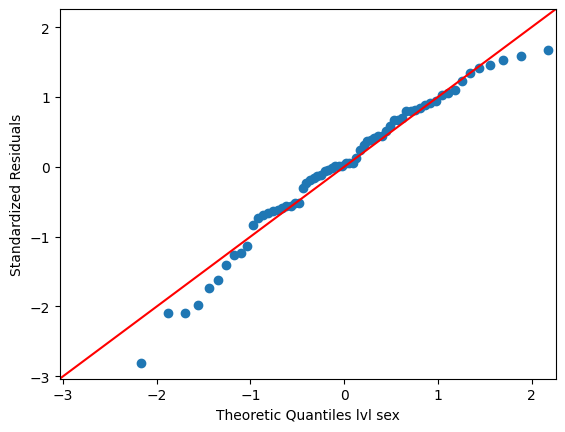

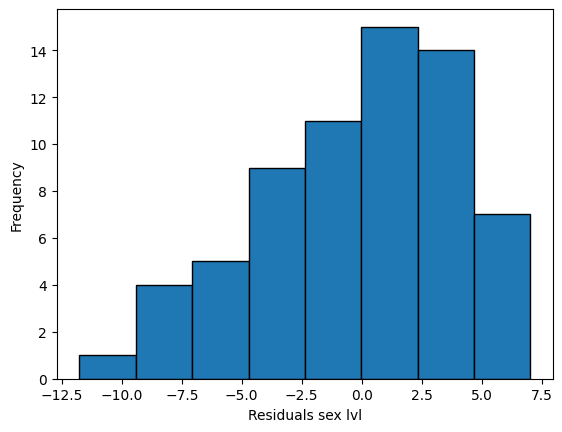

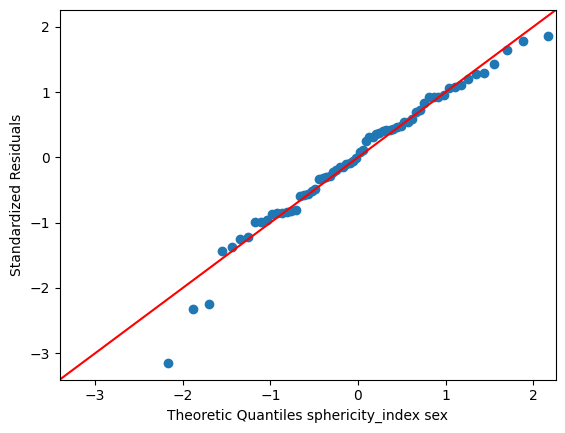

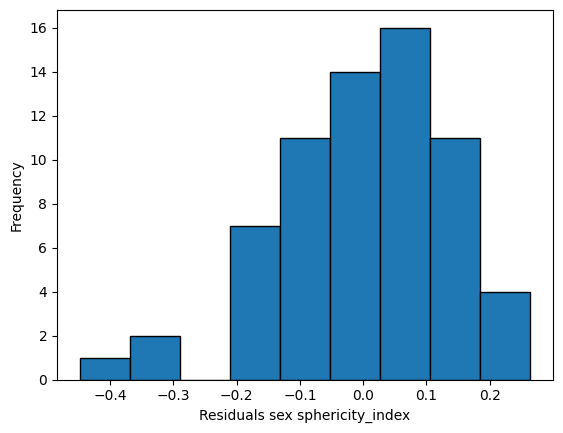

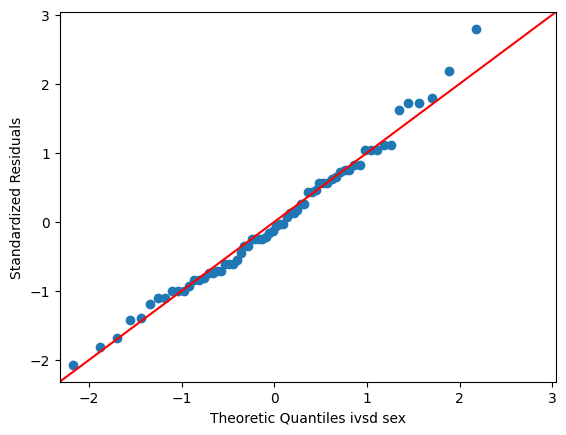

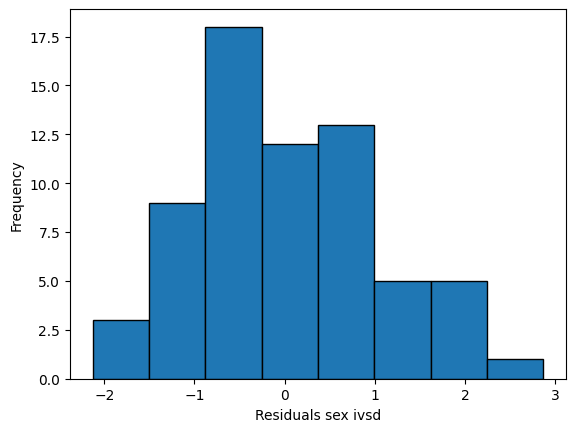

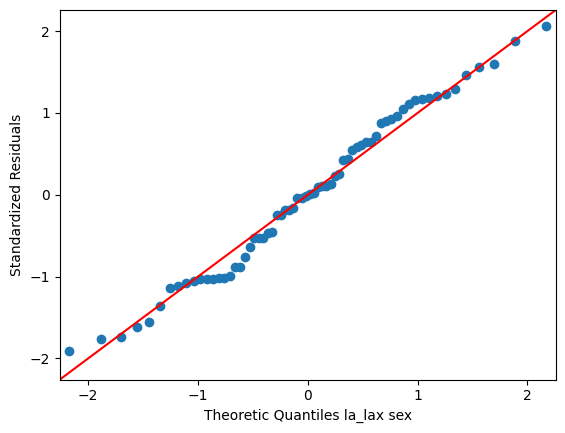

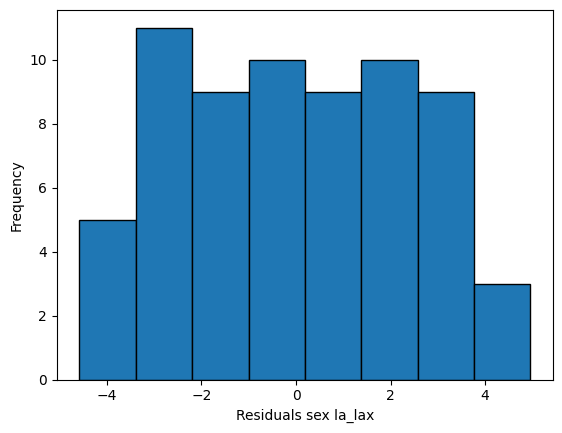

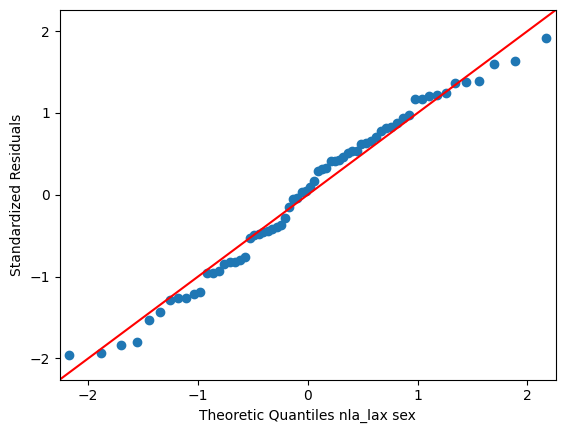

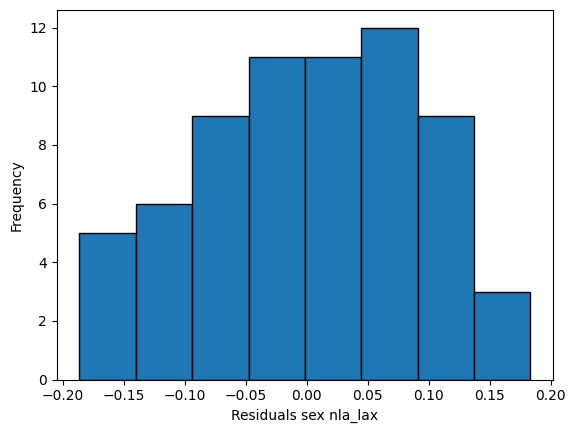

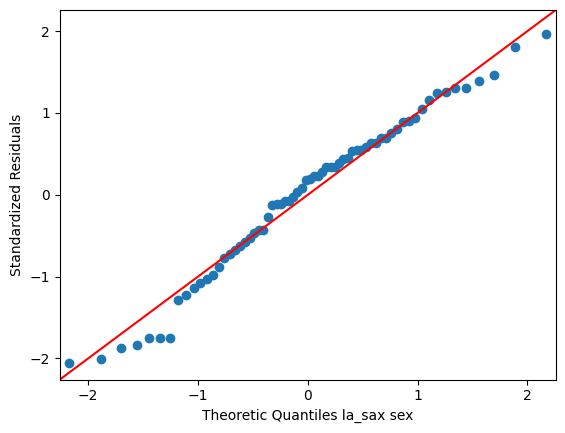

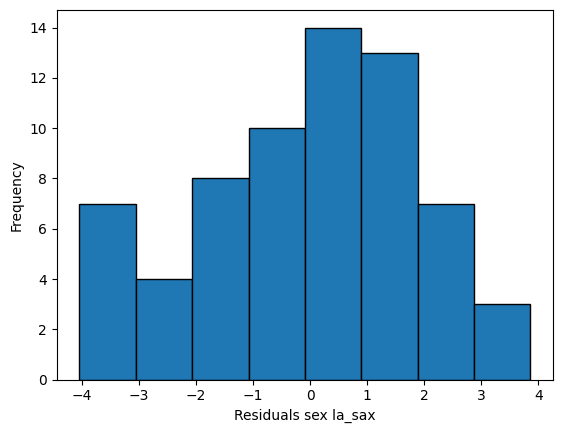

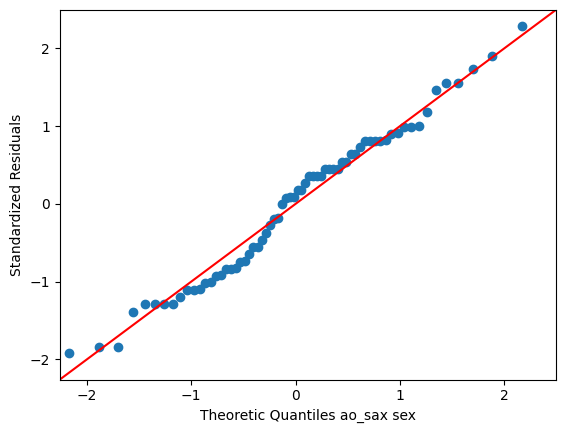

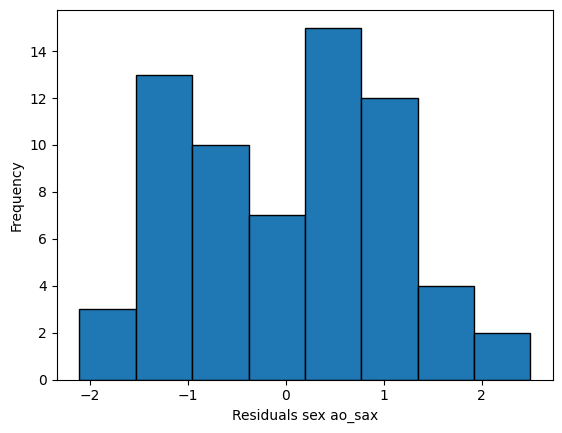

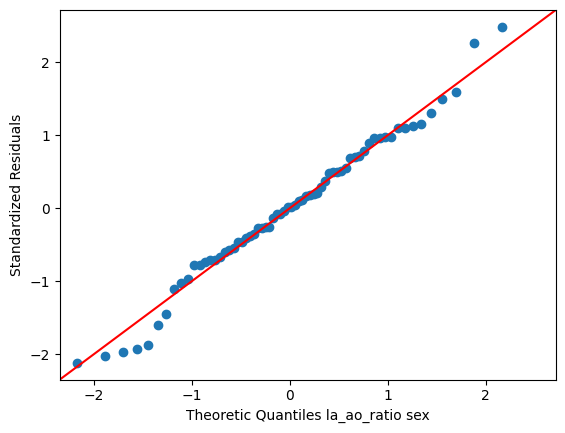

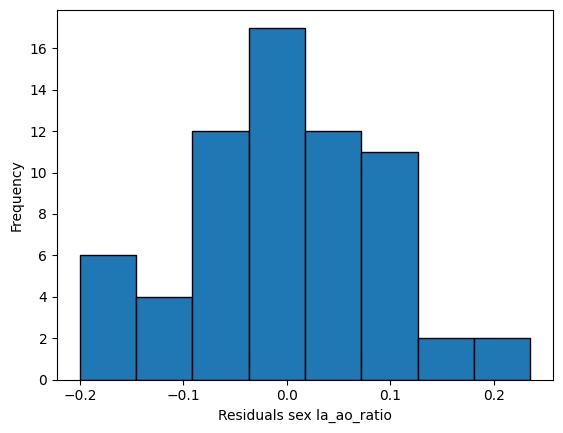

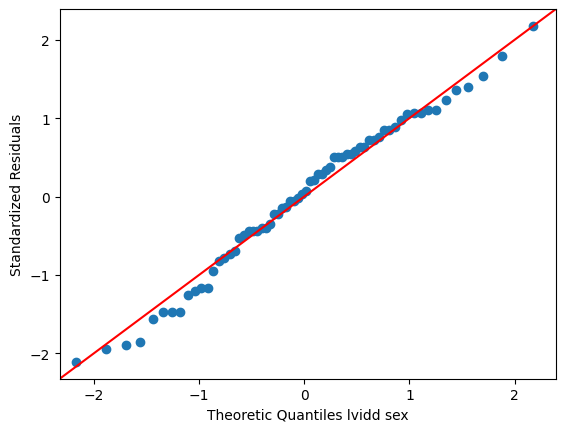

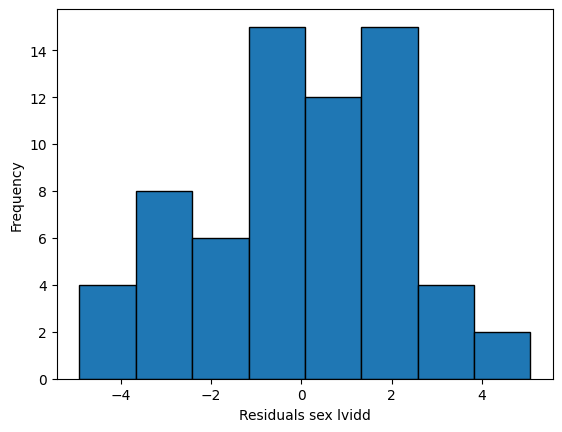

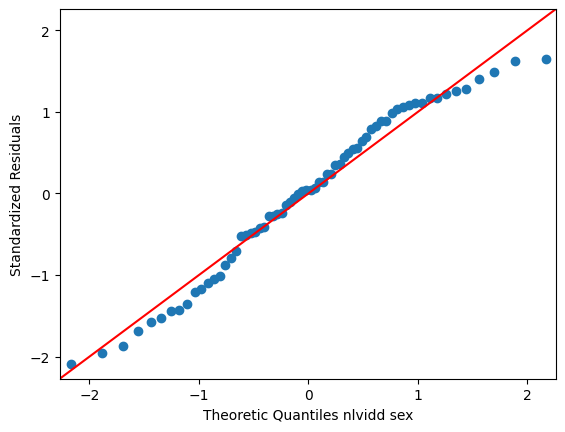

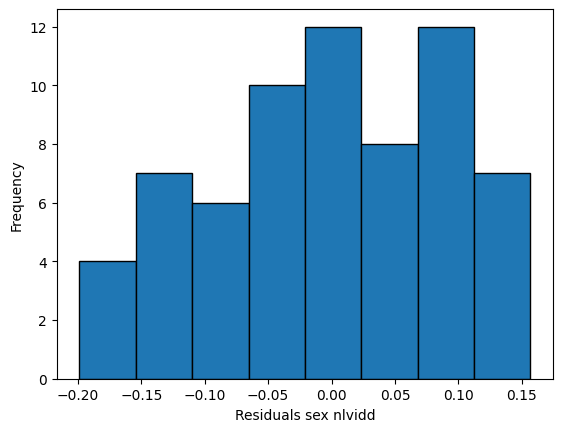

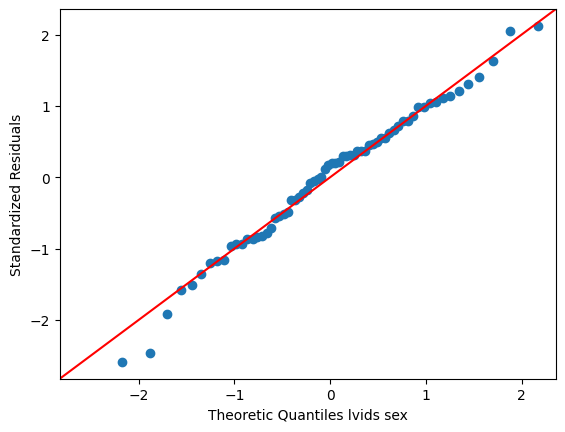

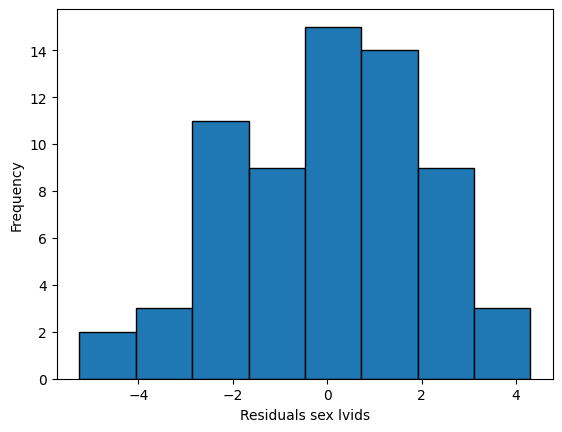

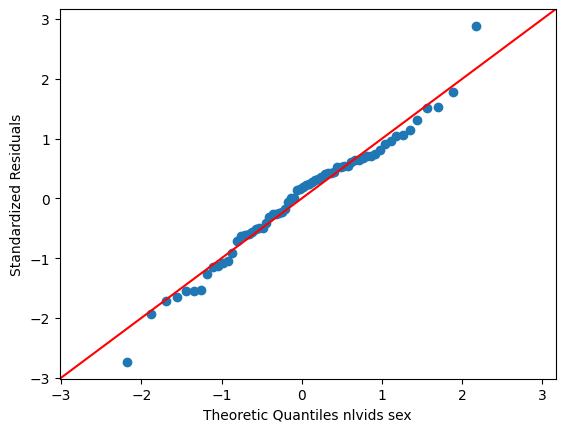

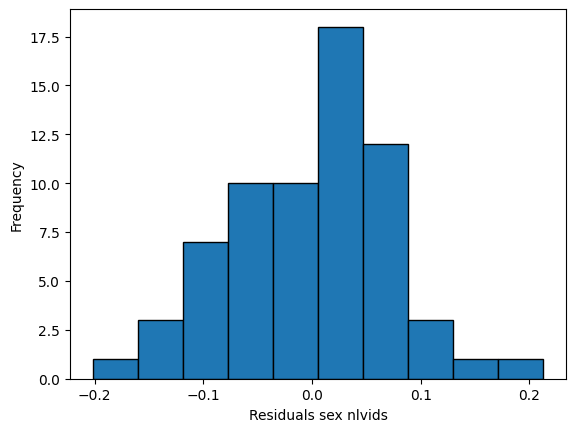

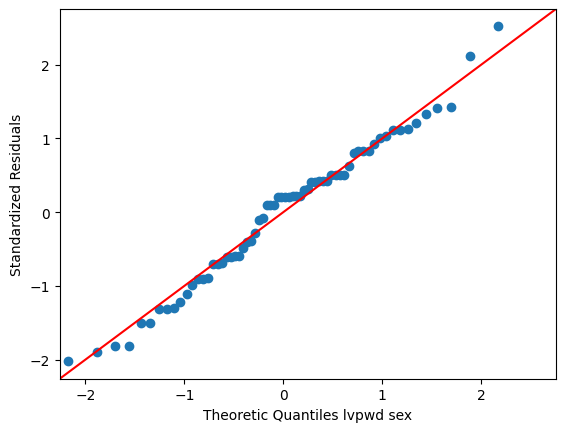

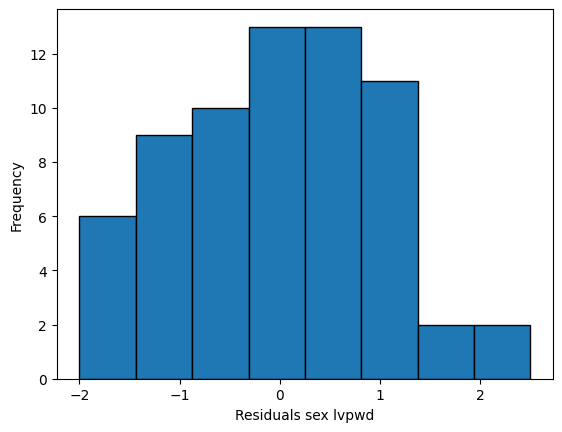

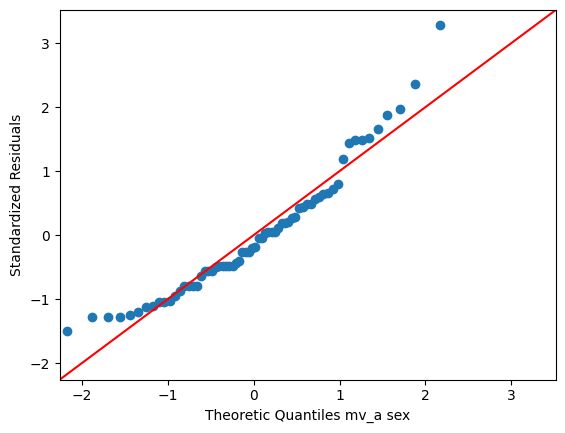

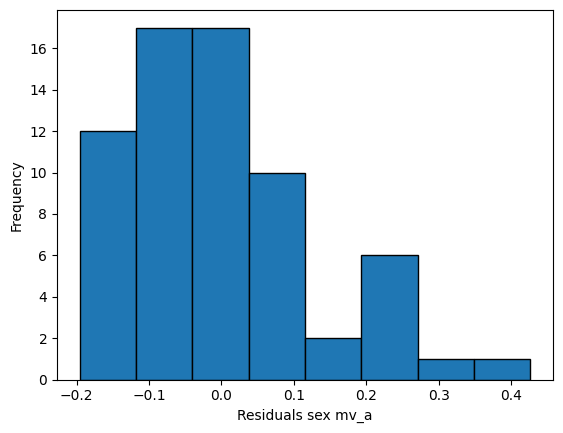

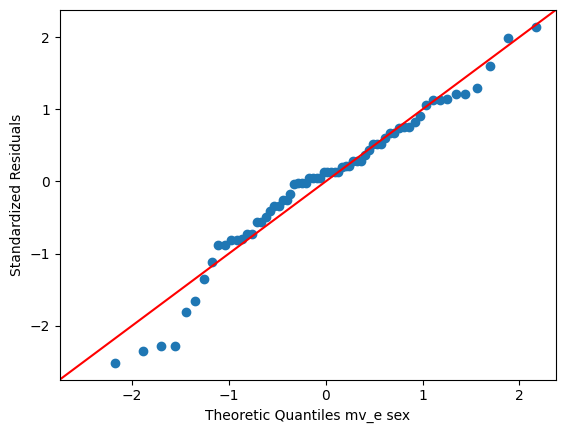

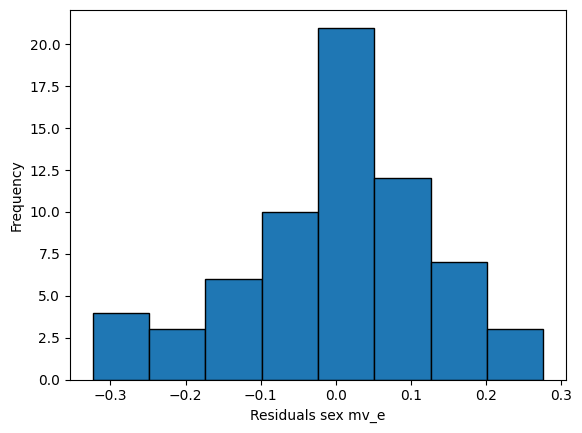

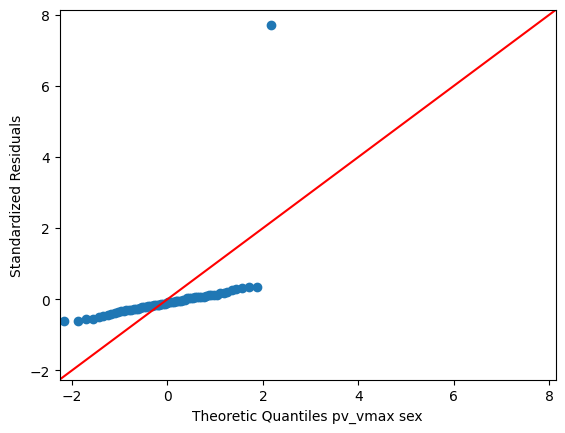

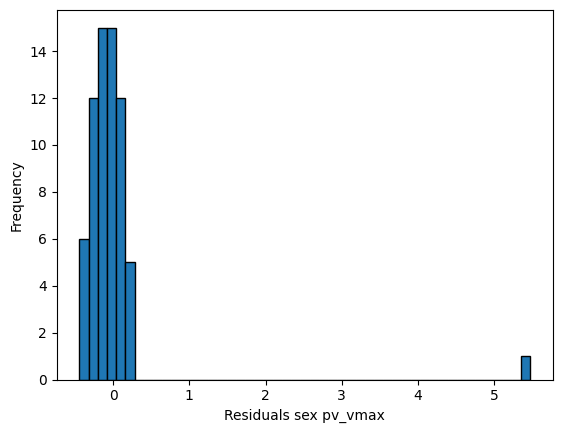

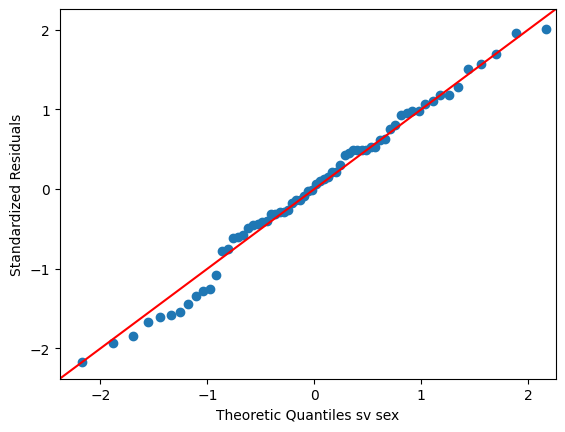

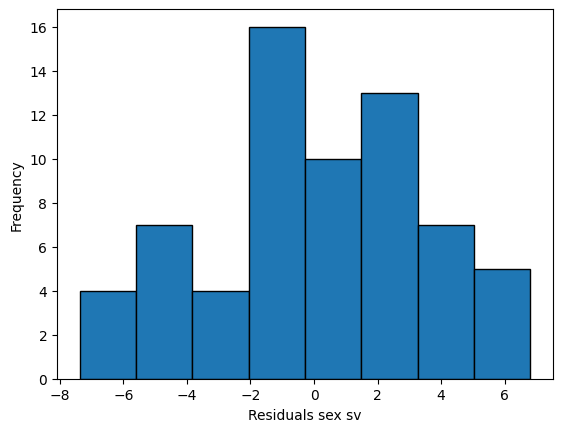

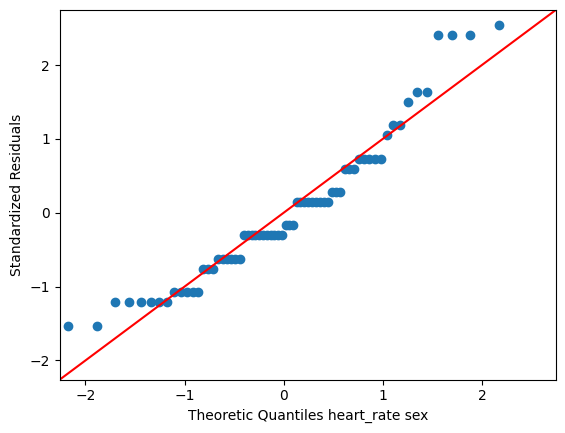

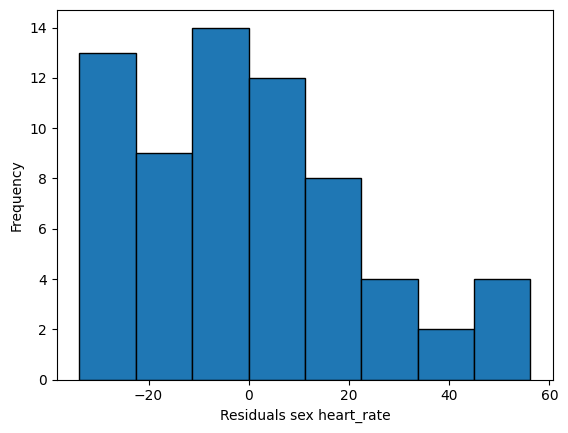

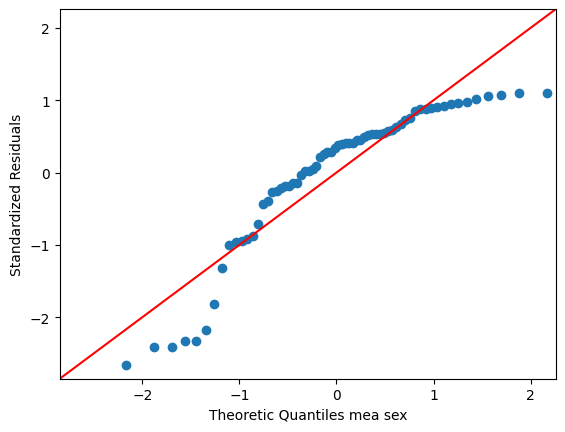

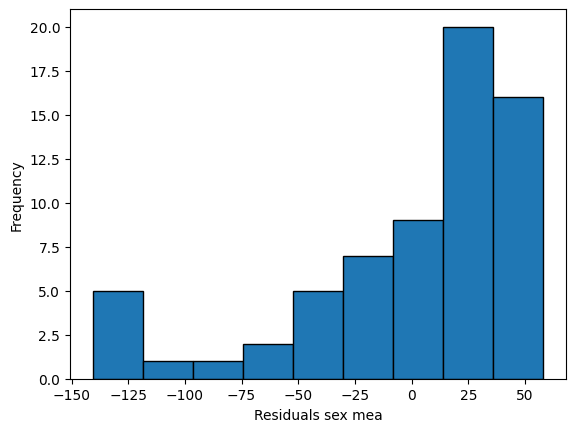

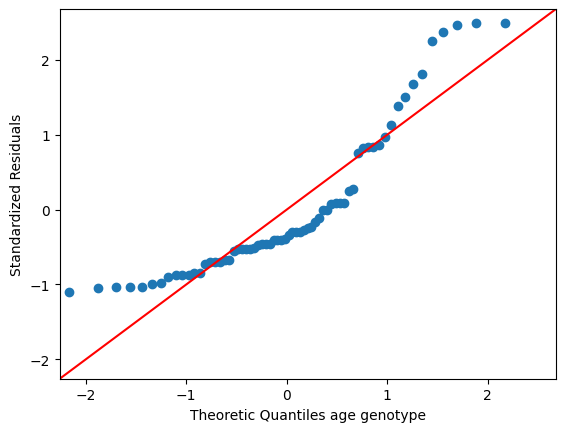

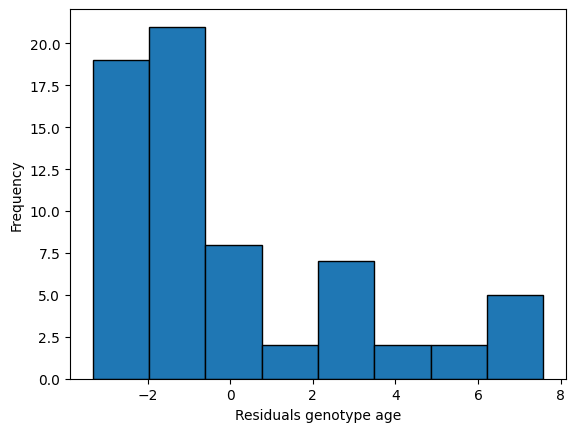

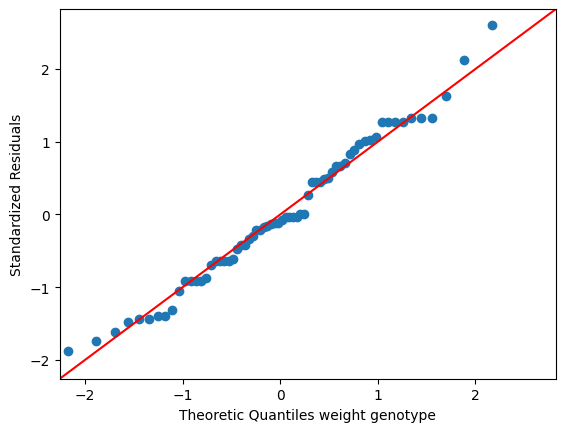

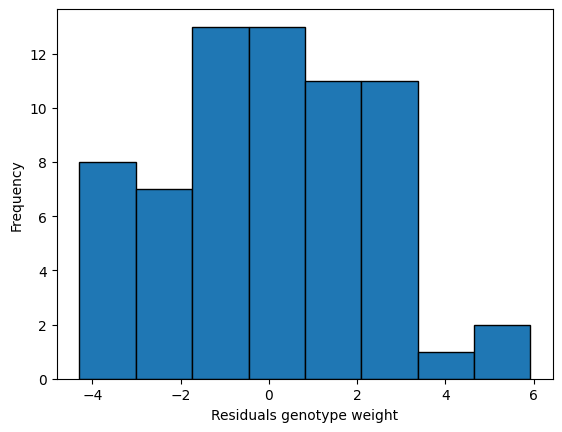

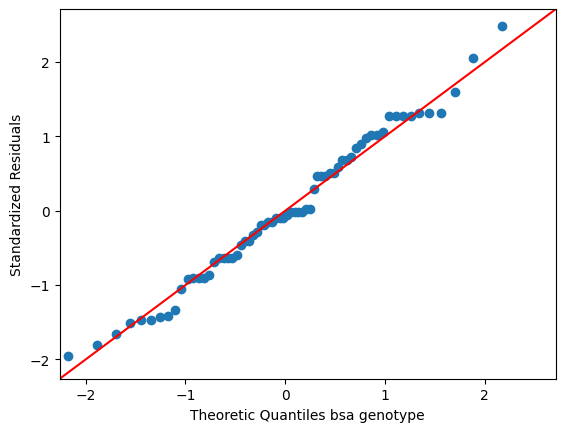

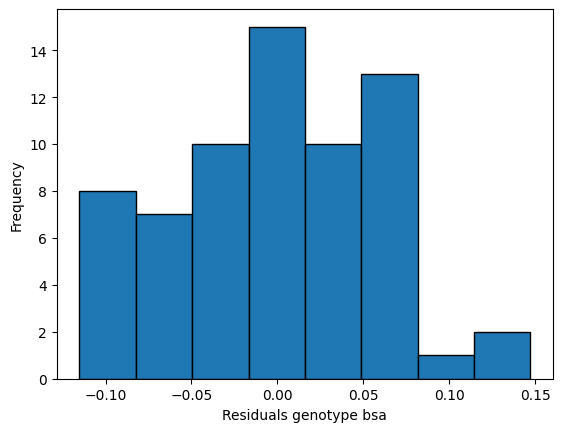

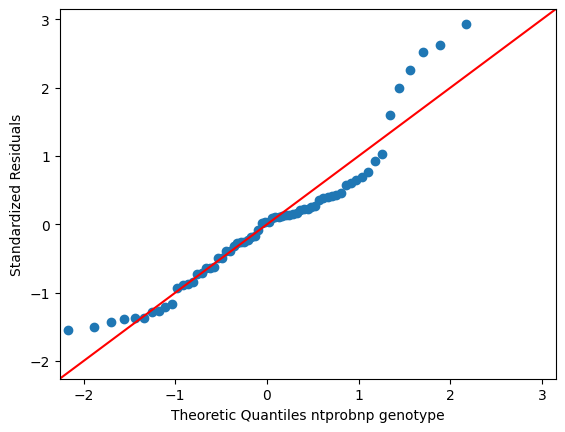

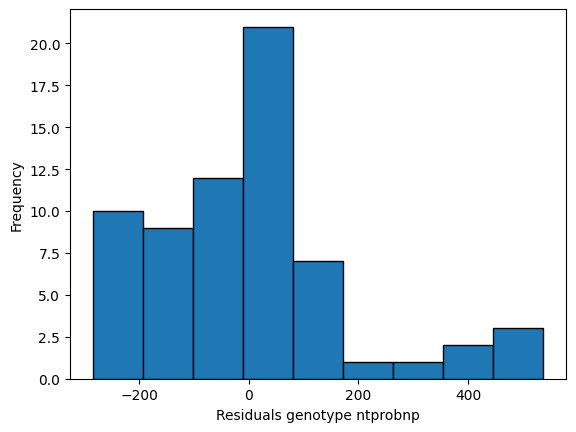

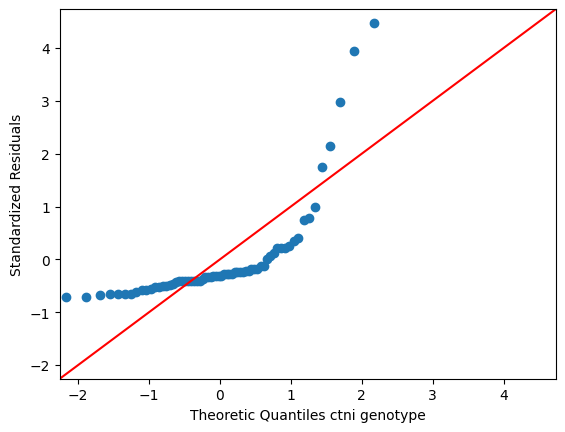

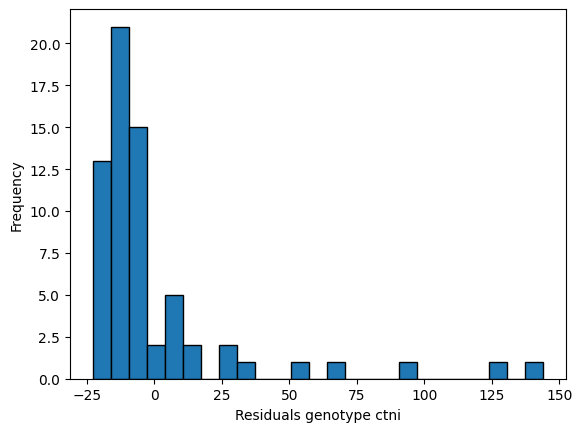

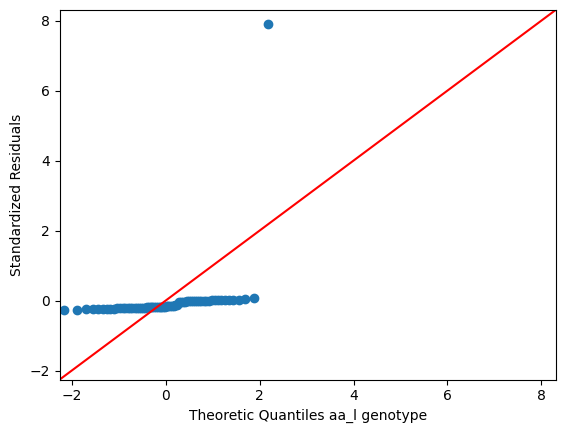

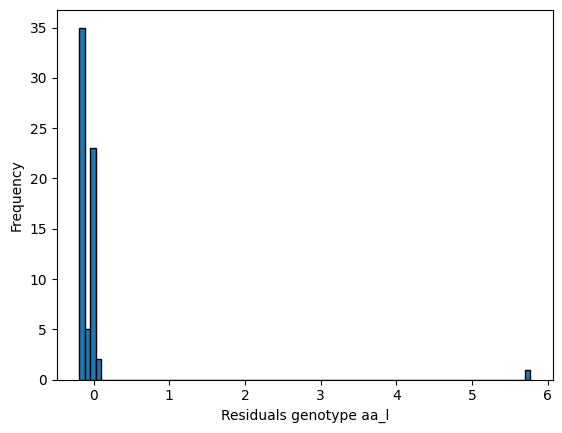

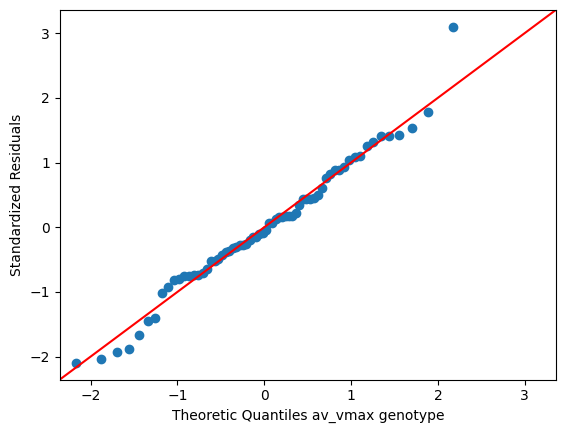

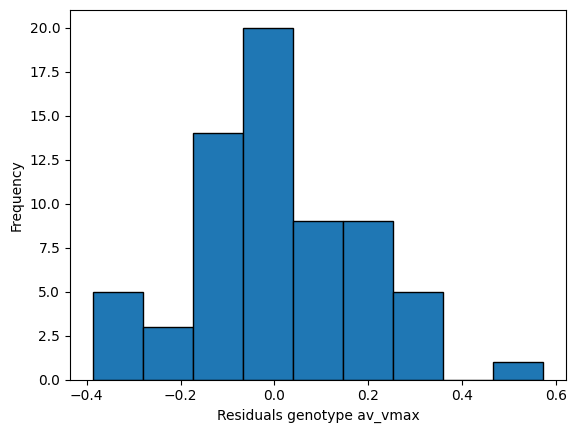

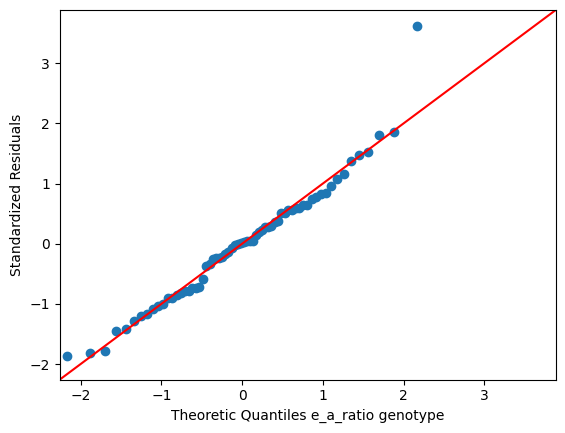

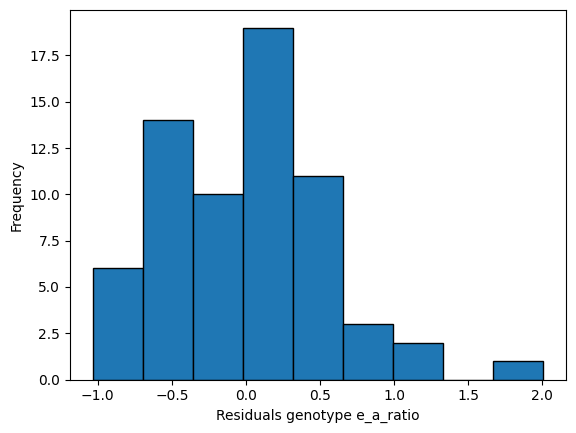

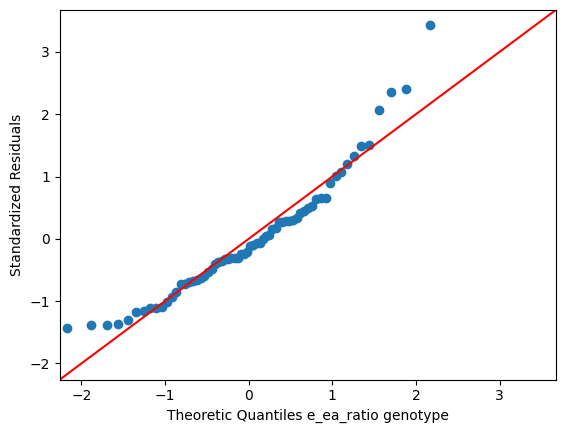

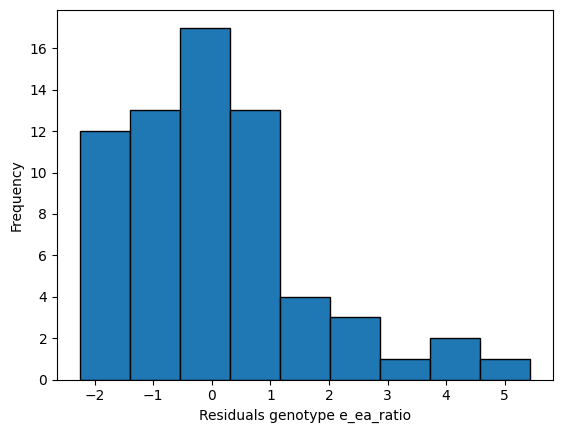

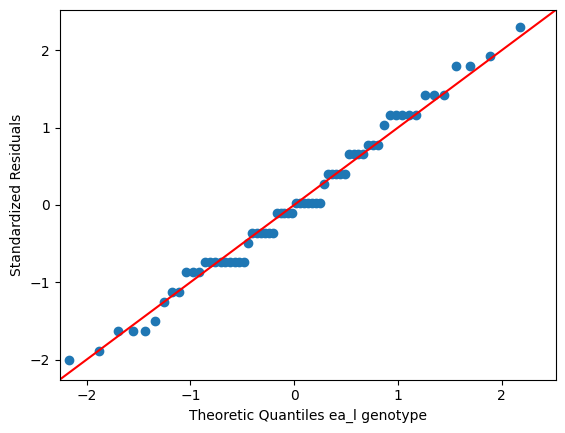

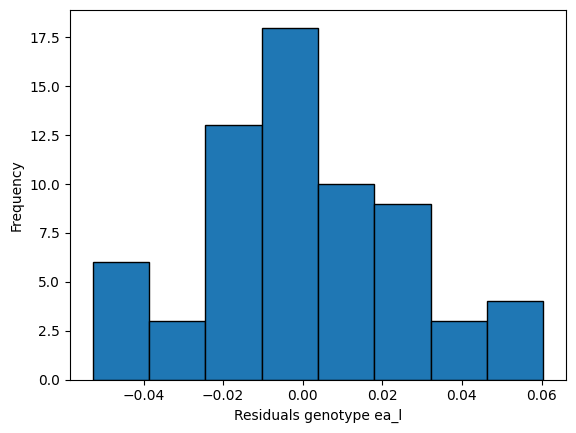

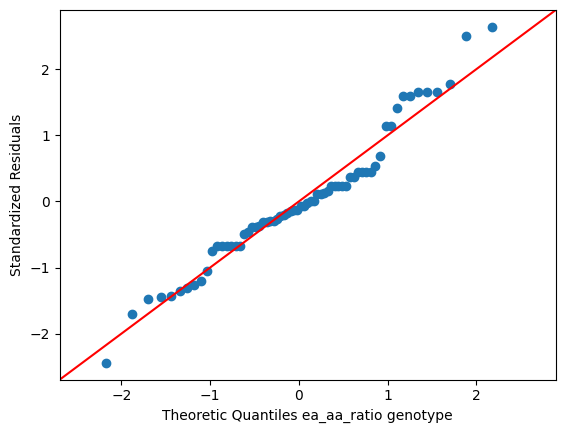

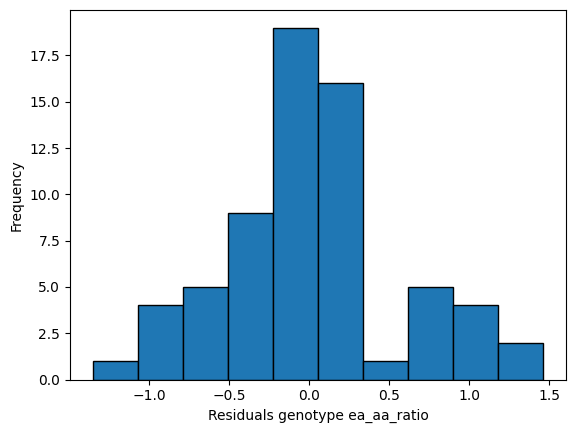

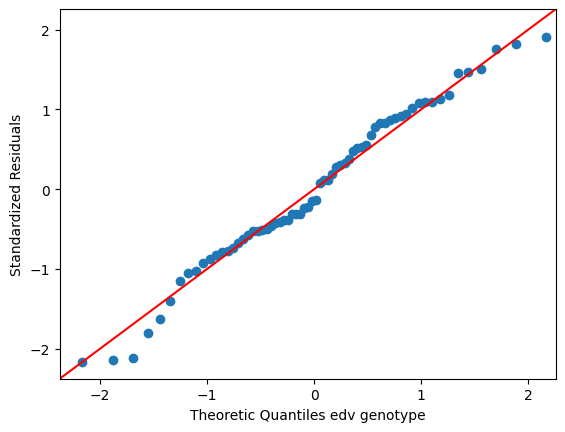

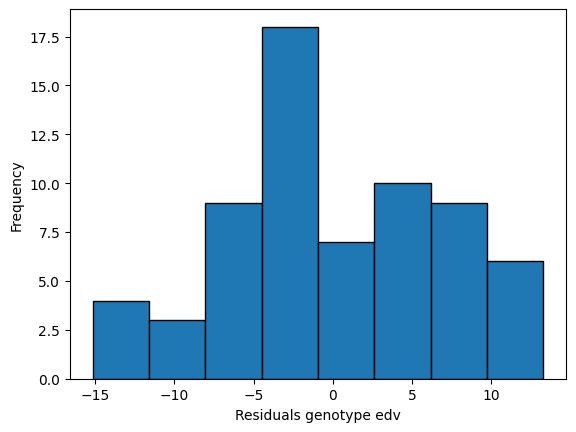

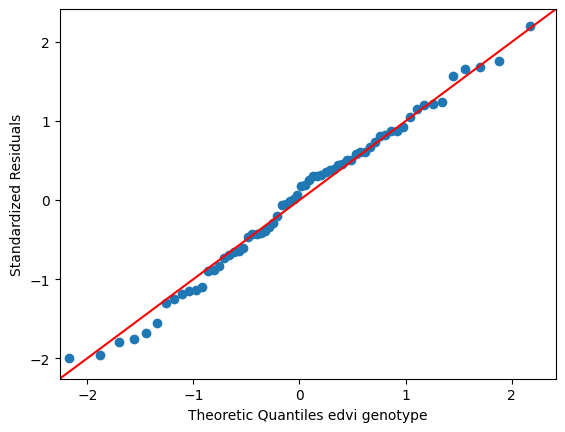

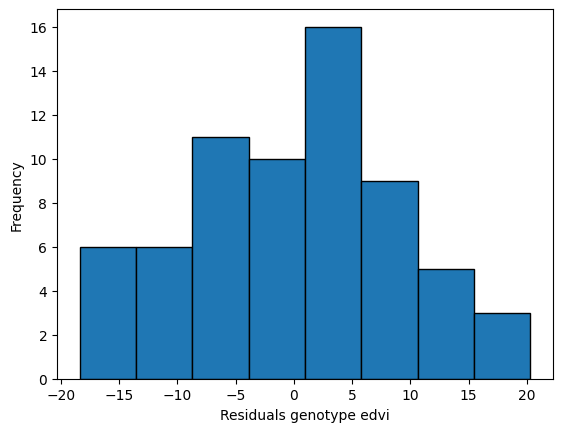

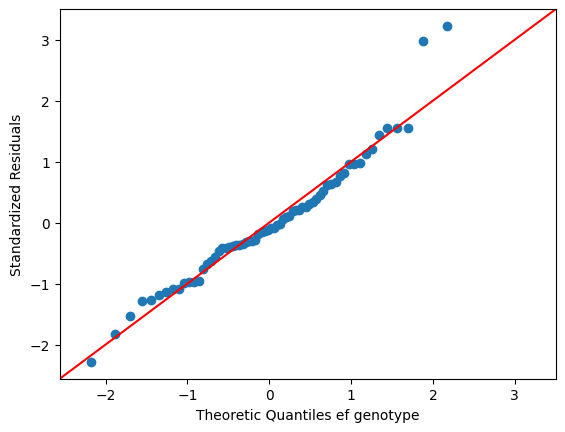

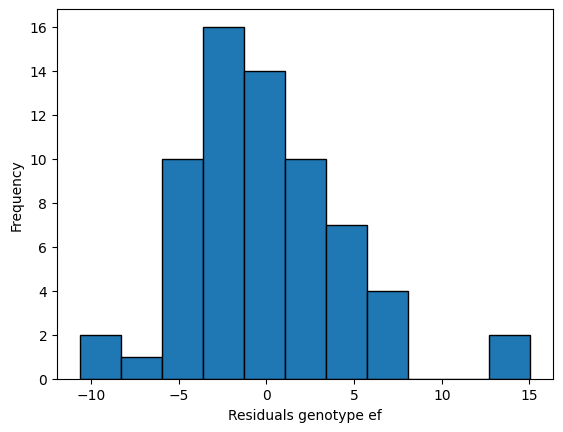

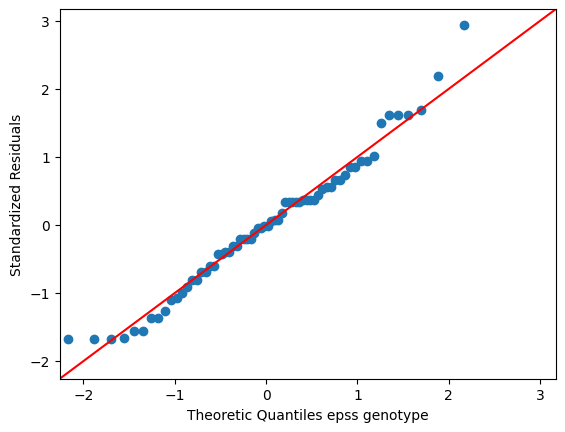

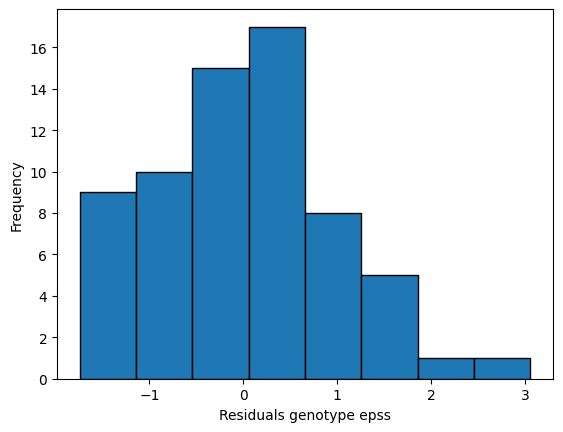

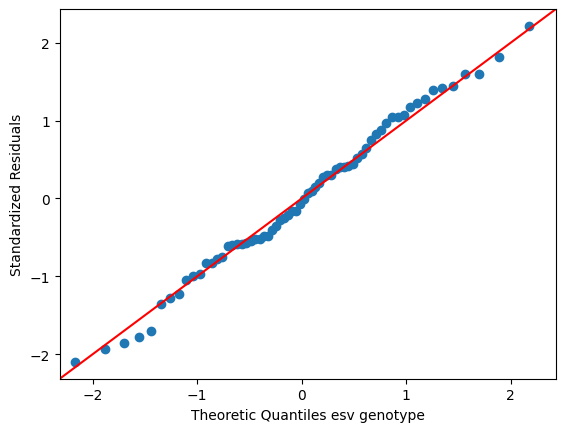

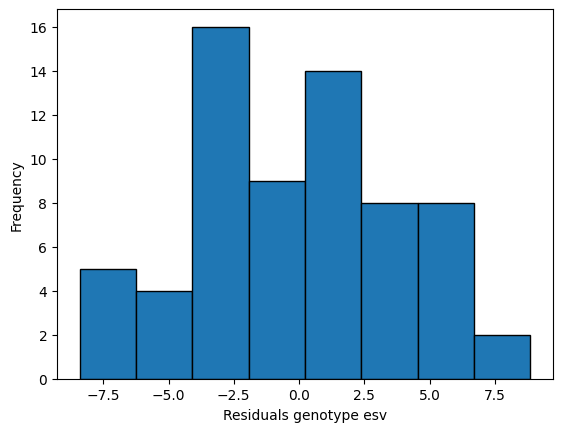

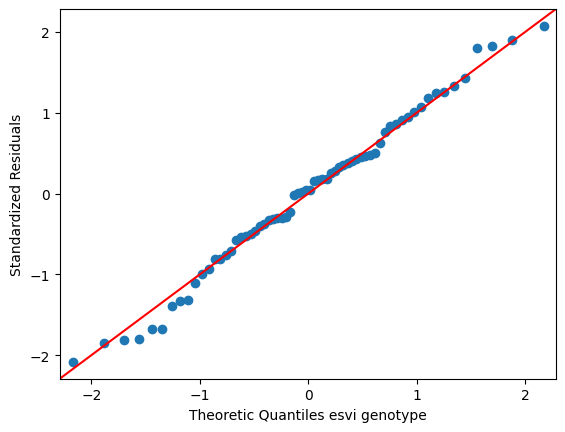

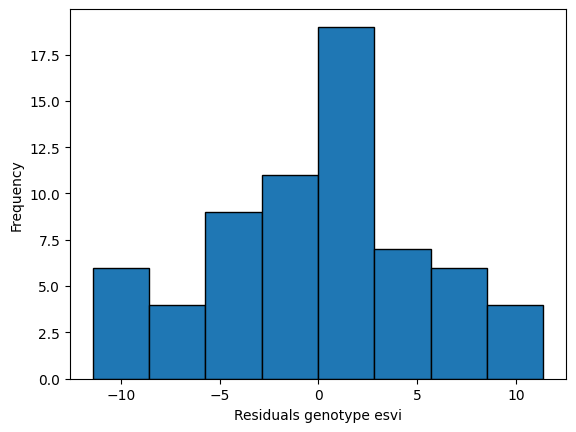

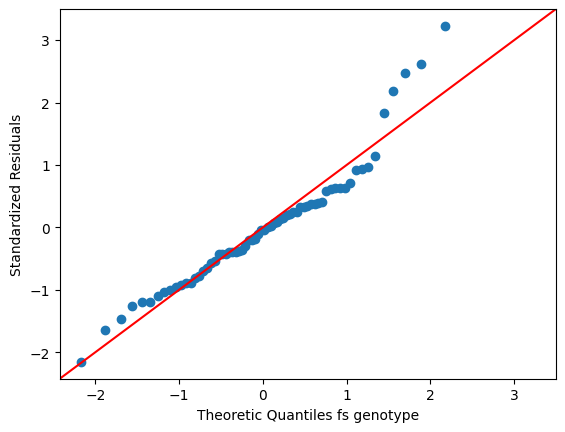

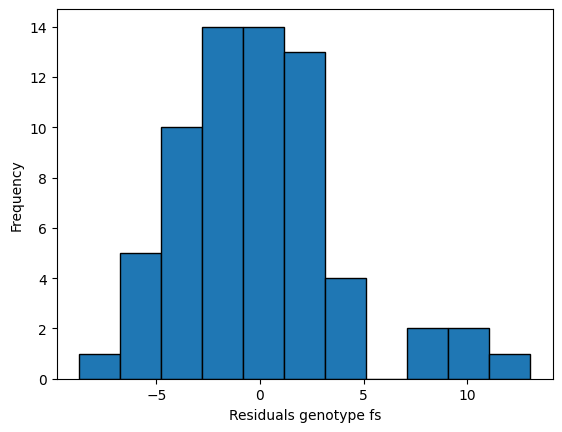

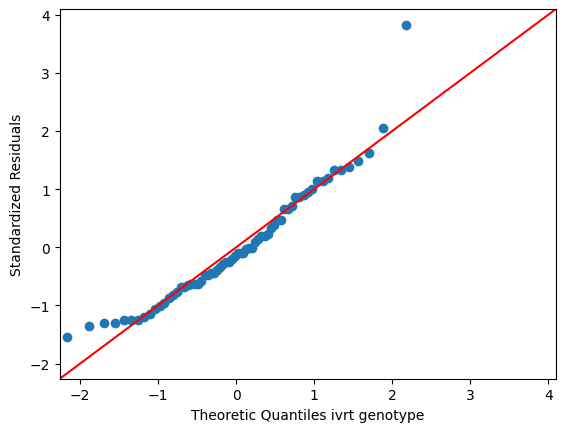

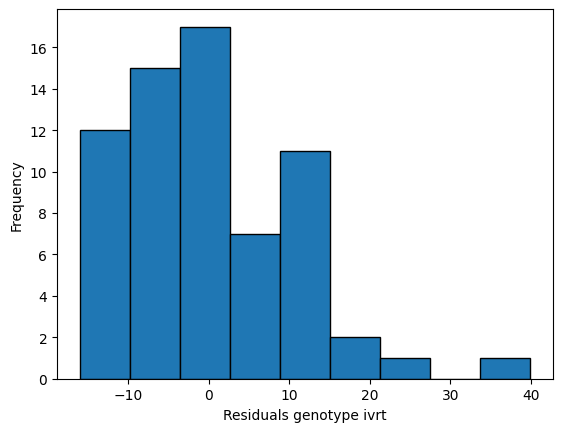

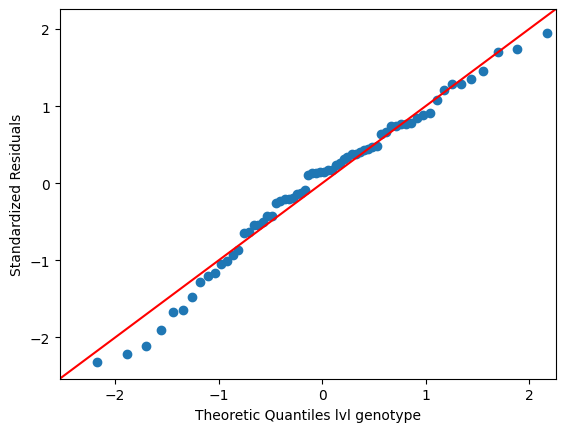

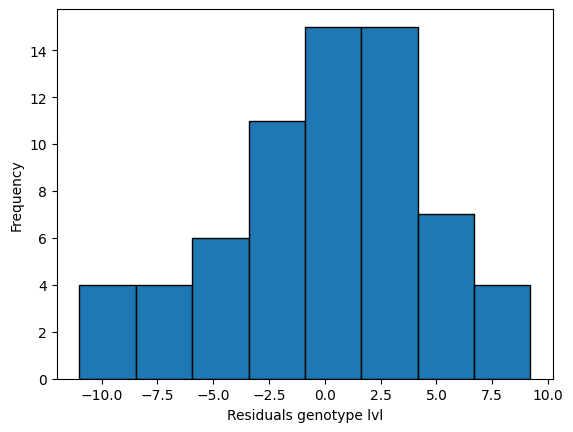

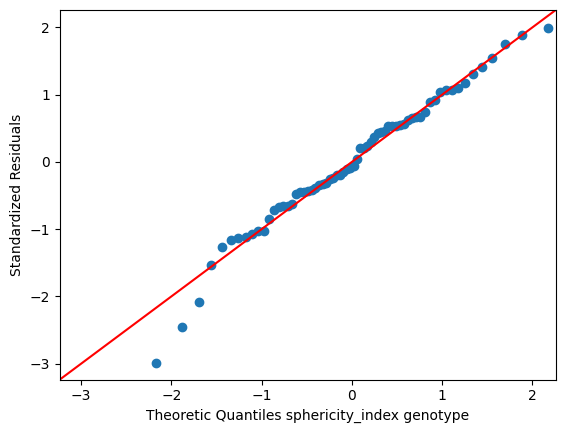

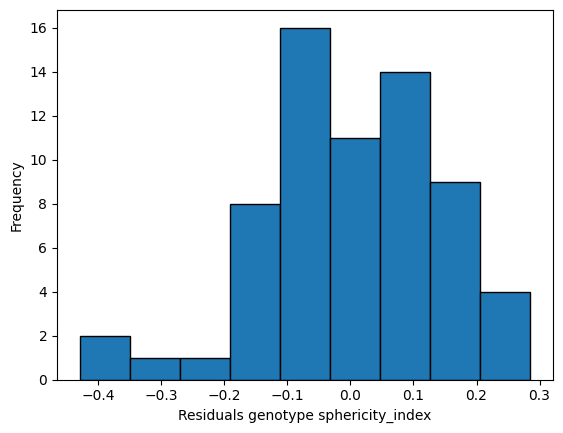

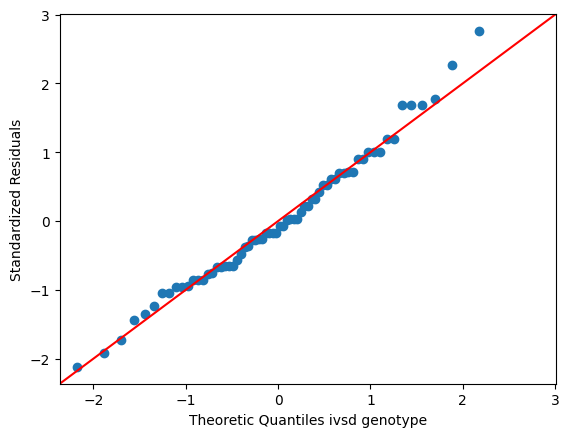

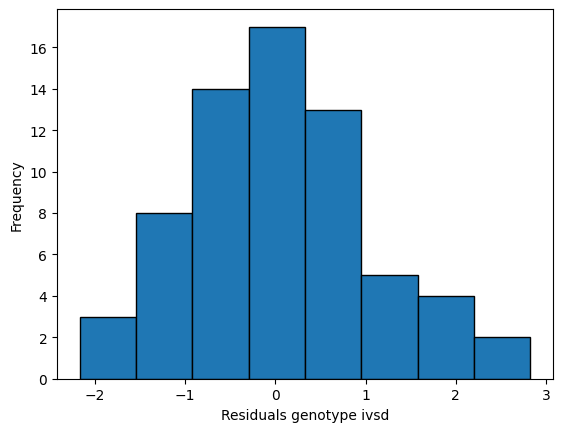

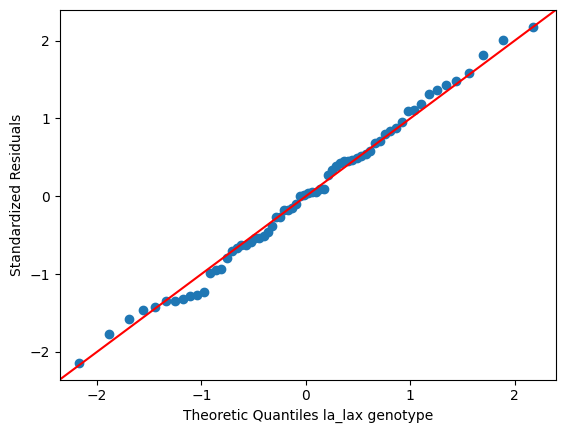

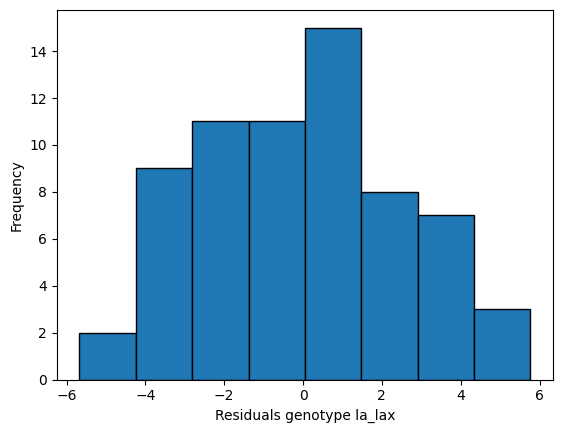

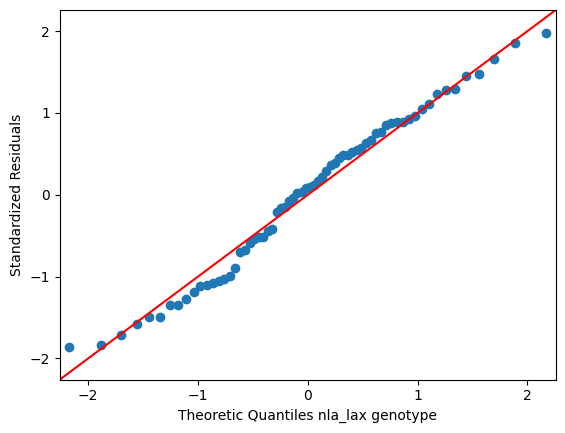

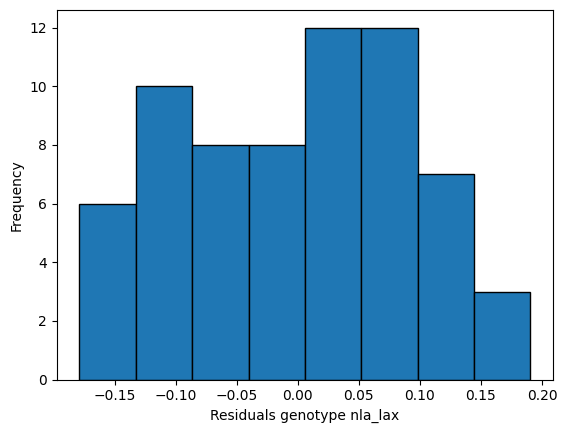

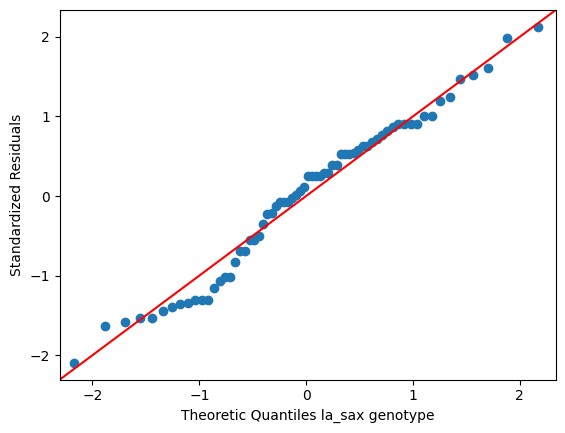

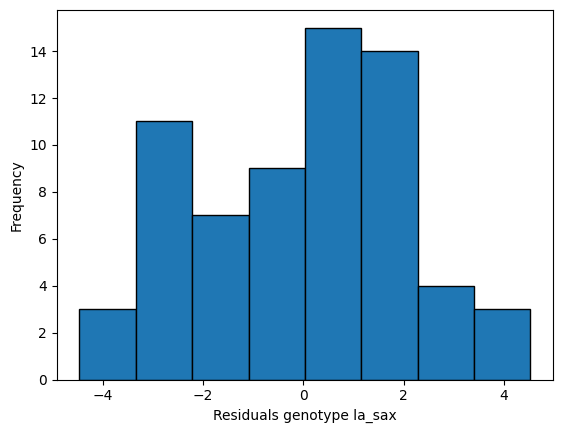

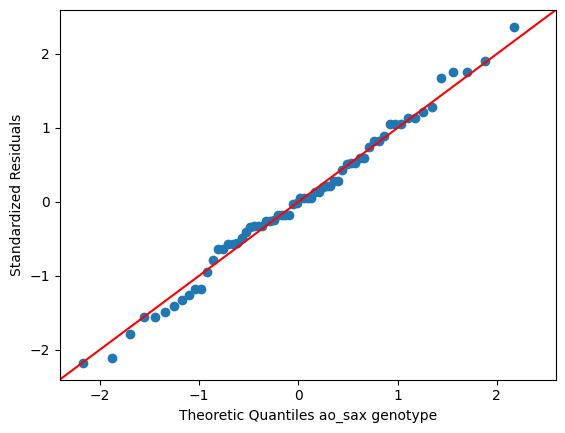

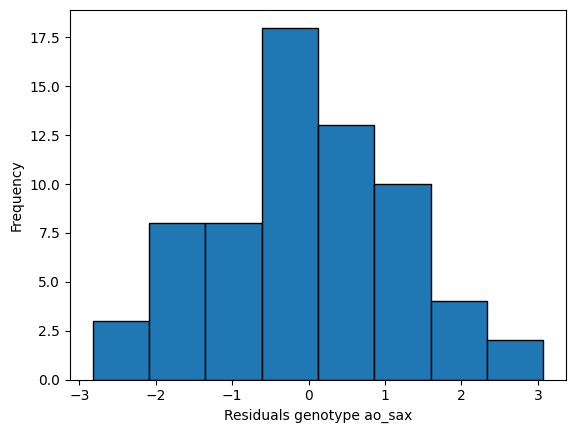

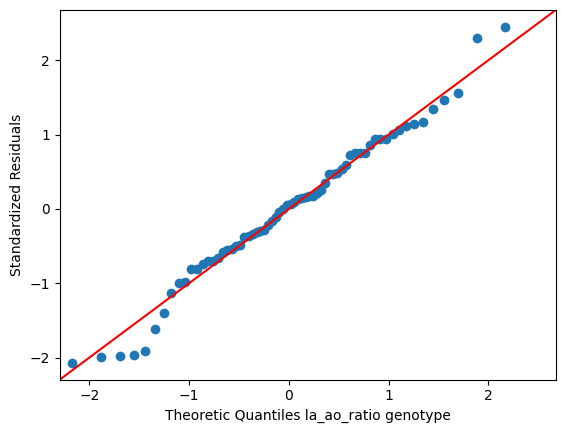

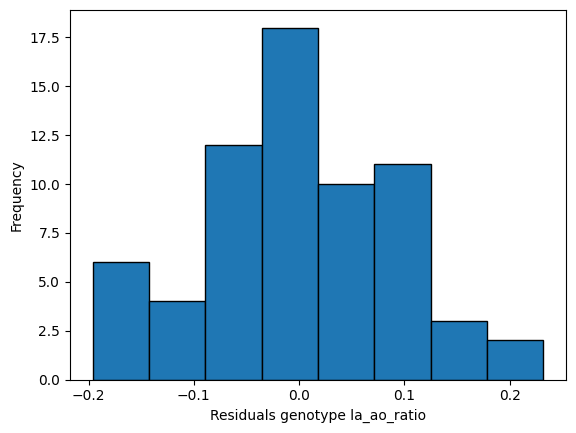

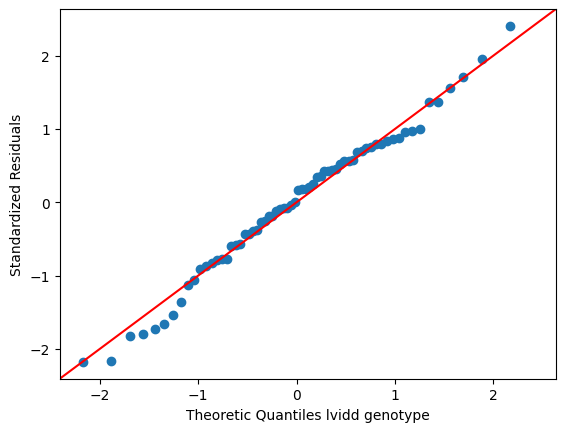

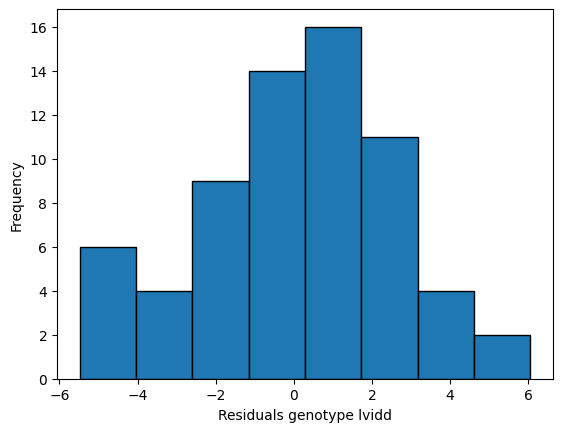

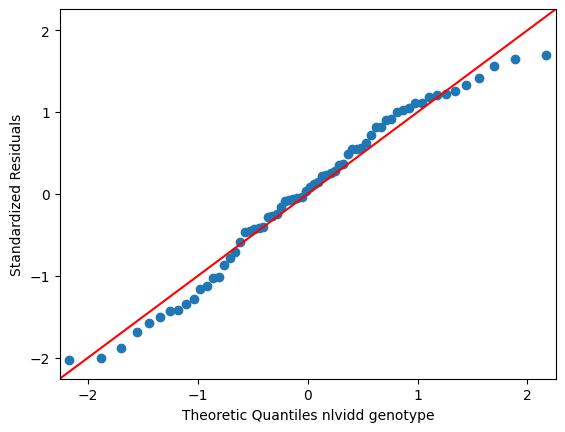

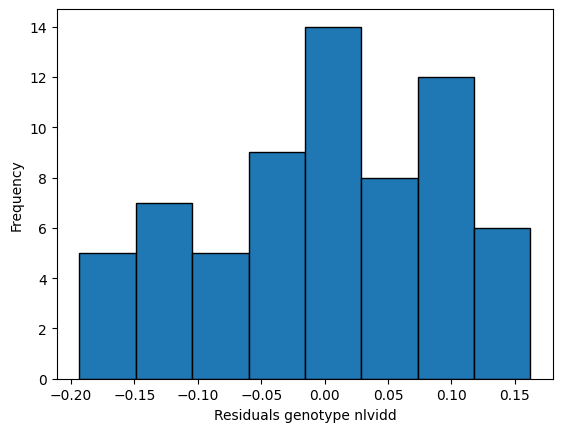

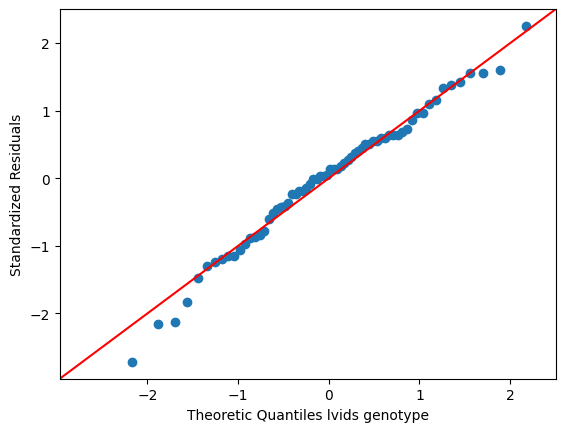

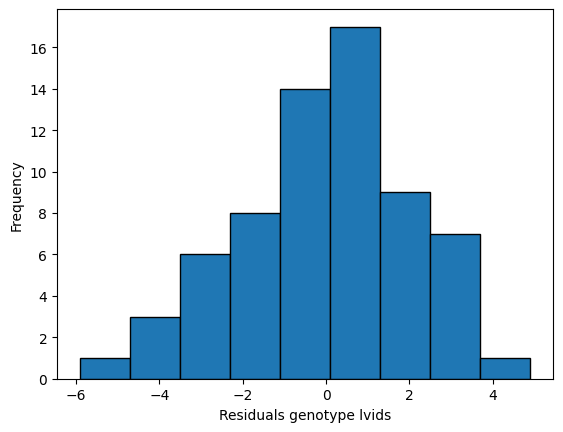

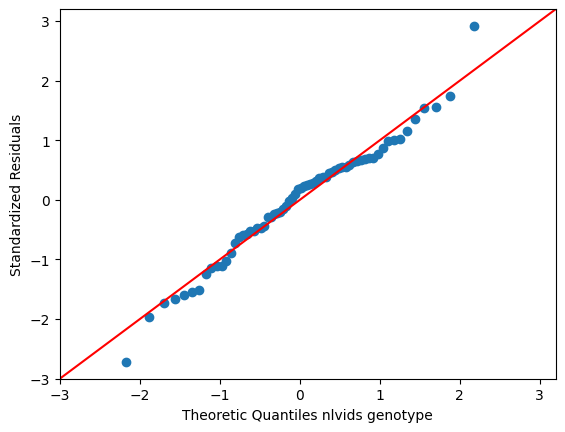

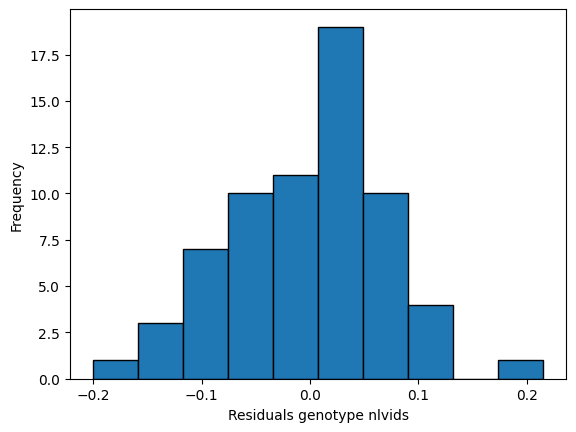

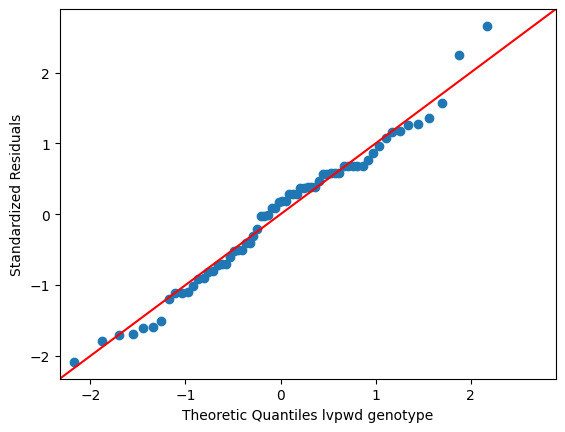

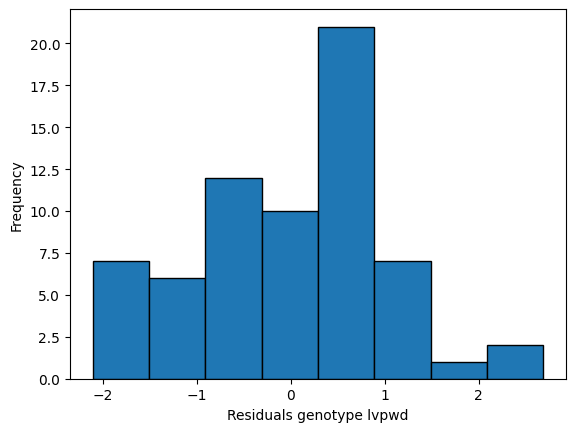

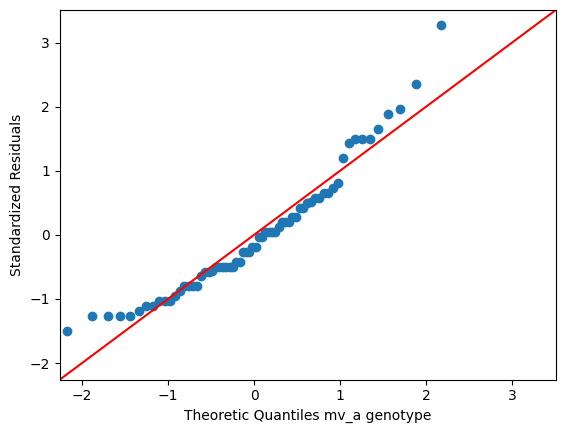

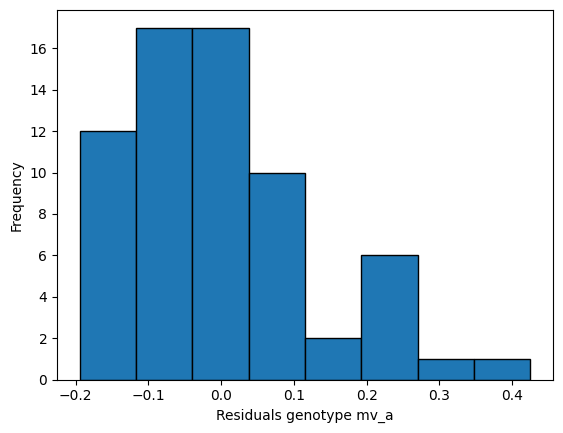

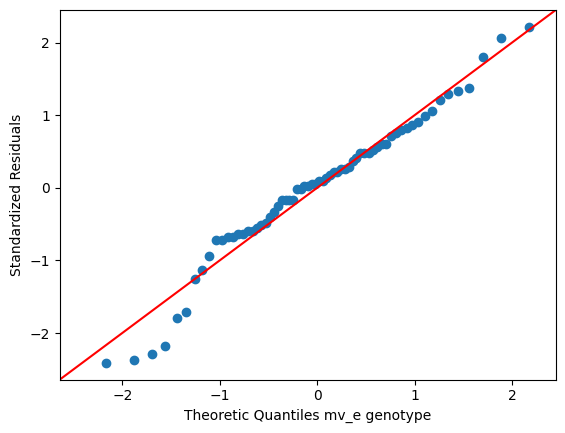

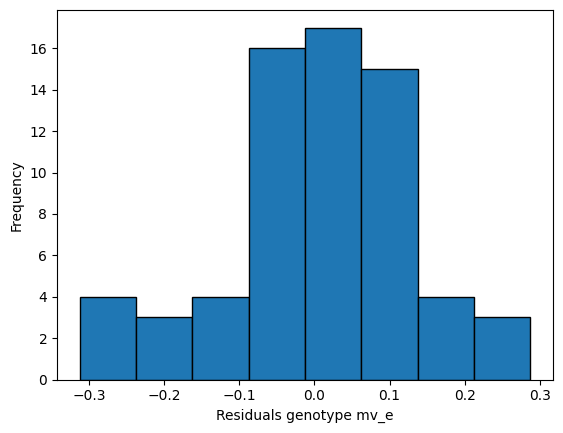

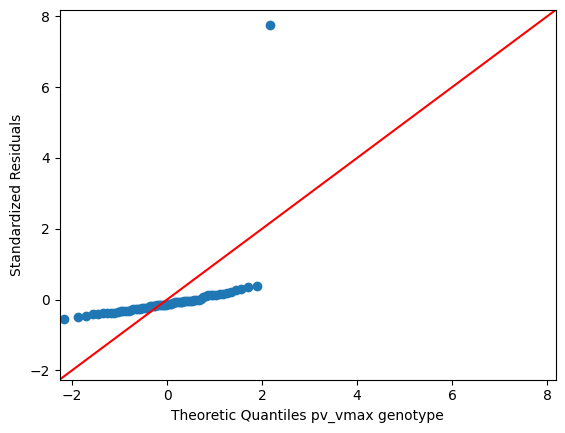

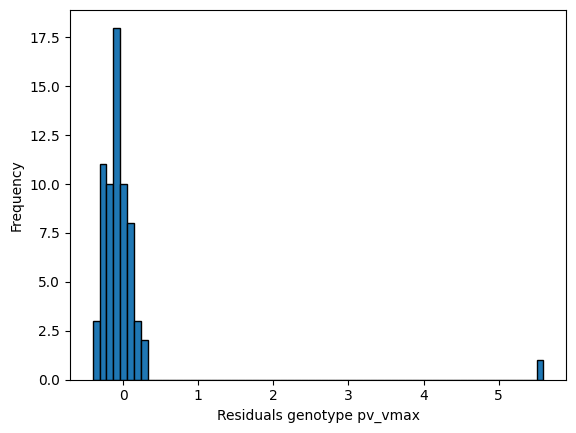

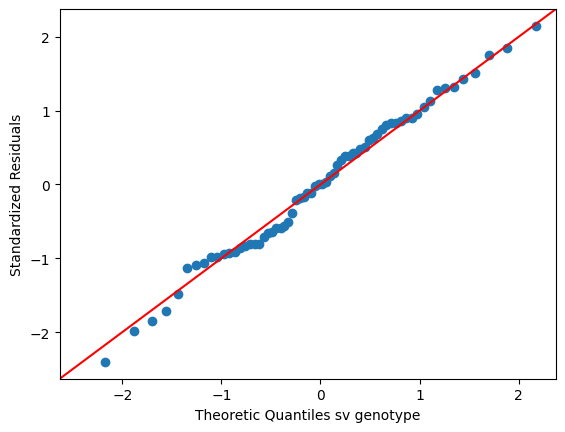

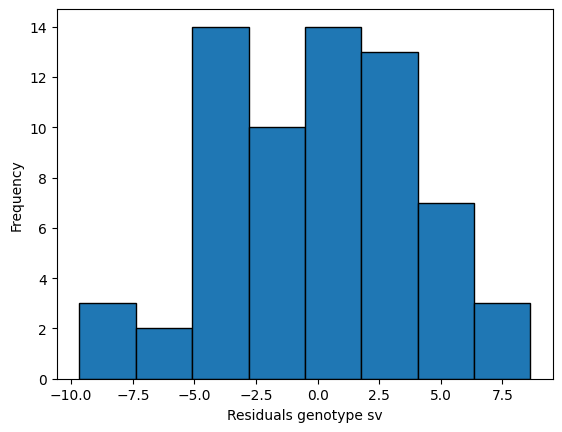

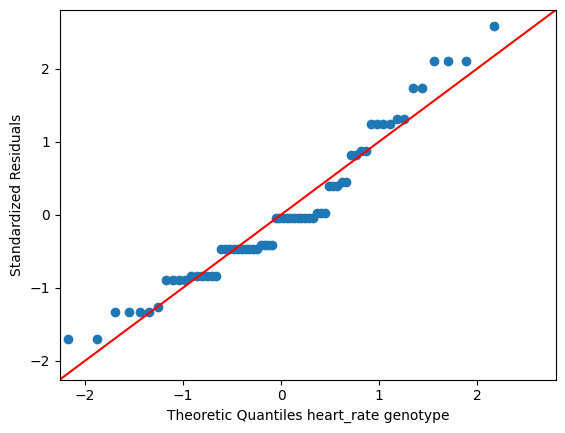

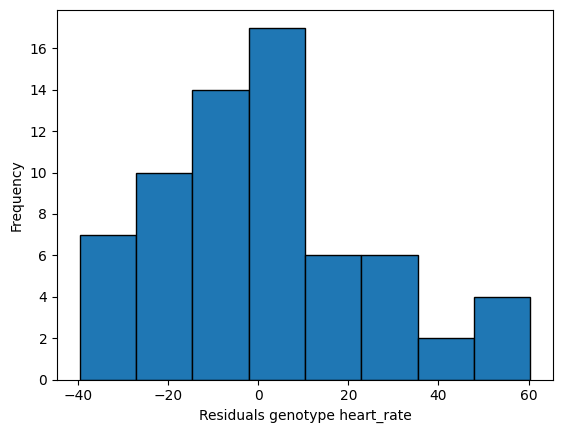

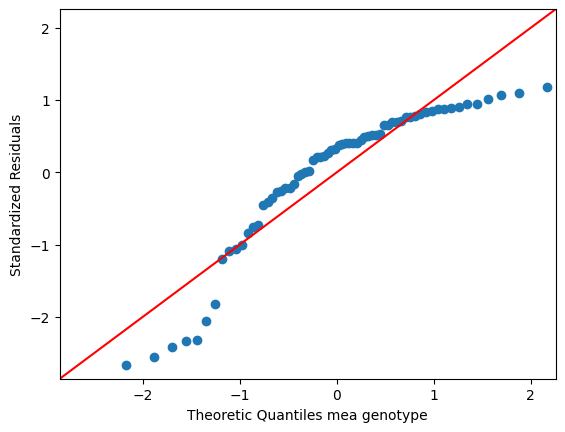

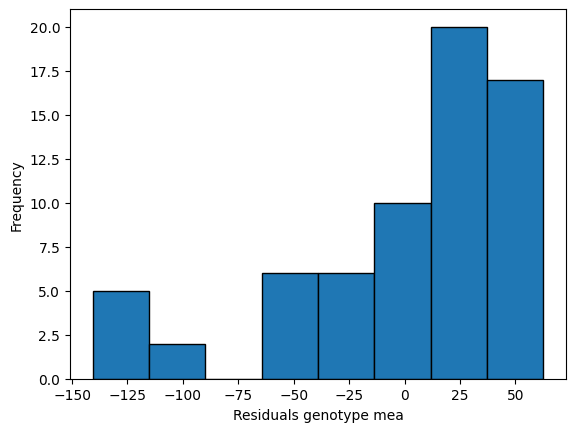

,group1,group2,Diff,Lower,Upper,q-value,p-value,df_num,dv_num,dv_nm,iv
0,2,1,0.165696,-1.339386,1.670778,0.311031,0.832071,1,0,age,sex
0,2,1,2.652936,1.737299,3.568573,8.185686,0.001000,1,1,weight,sex
0,2,1,0.068961,0.045245,0.092677,8.215125,0.001000,1,2,bsa,sex
0,2,1,44.445480,-45.825568,134.716528,1.391012,0.329021,1,3,ntprobnp,sex
0,2,1,7.696179,-8.255865,23.648223,1.363046,0.338764,1,4,ctni,sex


In [7]:


res = stat()
data_dict = {}
mt_data = pd.DataFrame()


ivs = iv_cat_list
df_evals = {1:sch}
dvs = dict(zip([*range(0, (len(iv_cont_list)), 1)], iv_cont_list))
# Set normality statistics
normal_on = 1
if normal_on != 0:
    f = open('my_normality.html','w')


# Set up dict for Full DVs Full Rank but Catgetoricals with No PPSN

for i in ivs: # independnet variable for xfac_var
    for k1,v1 in dvs.items():
        for k, v in df_evals.items():
            anova_df = v.loc[:,[v1,i]]
            print()
            res.tukey_hsd(df=anova_df, res_var=v1, xfac_var=i, anova_model=v1 + ' ~ C(' + i + ')')
            #Normality Section
            if normal_on !=0:
                my_shapiro = shapiro(res.anova_std_residuals)
                my_shapiro = str(my_shapiro)
                my_ks = kstest(res.anova_std_residuals, 'norm')
                my_ks = str(my_ks)

                # residuals qq
                sm.qqplot(res.anova_std_residuals,line='45')
                plt.xlabel('Theoretic Quantiles '+ v1+ ' ' + i)
                plt.ylabel("Standardized Residuals")
                my_fig0 = plt
                encoded0 = fig_to_base64(my_fig0)
                my_html0 = '<img src="data:image/png;base64, {}">'.format(encoded0.decode('utf-8'))
                f.write("The residuals normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html0)

                # residuals histogram
                my_fig1 = plt.figure()
                plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
                plt.xlabel('Residuals' + ' ' + i + ' ' + v1)
                plt.ylabel('Frequency')
                plt.show()

                # Histogram Writing
                tmpfile = BytesIO()
                my_fig1.savefig(tmpfile, format='png')            
                encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
                # encoded = base64.b64encode(tmpfile.getvalue()).decode('utf8') <img src='data:image/png;base64,{{}}'>
                my_html1 = '---' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + '---'
                f.write("The histogram normality plot is based upon {} and {} and KS is {} and Shapiro is {}.".format(v1, i, my_ks, my_shapiro))
                f.write(my_html1)



            tmp = res.tukey_summary
            tmp['df_num'] = k
            tmp['dv_num'] = k1
            tmp['dv_nm'] = v1
            tmp['iv'] = i
            data_dict[k] = tmp
            mt_data = mt_data.append(data_dict[k])

# mt_data.to_excel("diffs_session.xlsx")  
mt_data.head()


In [4]:
# print(sch.shape)
geno_0 = sch.loc[(sch['genotype'] == 0)]
# print(geno_0.shape)
geno_1 = sch.loc[(sch['genotype'] == 1)]
# print(geno_1.shape)
sex_1 = sch.loc[(sch['sex'] == 1)]
# print(sex_1.shape)
sex_2 = sch.loc[(sch['sex'] == 2)]
# print(sex_2.shape)

# ivs = iv_cat_list
df_evals = {1:sch}
dvs = dict(zip([*range(0, (len(iv_cont_list)), 1)], iv_cont_list))
print(dvs)
# iv_dict = {geno_0:geno_1, sex_1:sex_2}
def wilc(ds1,ds2,iv):
    umann_data = pd.DataFrame()
    for k1,v1 in dvs.items():
        df1 = ds1[v1]
        df2 = ds2[v1]
        U1, p_all = mannwhitneyu(df1, df2, method="exact")
        p = "{:.4f}".format(p_all)
        # print(U1, p)
        u_stat = pd.DataFrame([U1], columns=['U1'])
        u_p = pd.DataFrame([p], columns=['p'])
        u_mann_in = u_p.merge(u_stat, how='cross')
        u_mann_in['dv_num'] = k1
        u_mann_in['iv'] =  iv
        u_mann_in['dv'] = v1        
        umann_data = pd.concat([umann_data,u_mann_in])
    return umann_data

# mt_data.to_excel("diffs_session.xlsx")  

wil_geno = wilc(geno_0,geno_1,"geno")
wil_gender = wilc(sex_1,sex_2,"gender")

my_umnann = pd.concat([wil_geno,wil_gender])



{0: 'age', 1: 'weight', 2: 'bsa', 3: 'ntprobnp', 4: 'ctni', 5: 'aa_l', 6: 'av_vmax', 7: 'e_a_ratio', 8: 'e_ea_ratio', 9: 'ea_l', 10: 'ea_aa_ratio', 11: 'edv', 12: 'edvi', 13: 'ef', 14: 'epss', 15: 'esv', 16: 'esvi', 17: 'fs', 18: 'ivrt', 19: 'lvl', 20: 'sphericity_index', 21: 'ivsd', 22: 'la_lax', 23: 'nla_lax', 24: 'la_sax', 25: 'ao_sax', 26: 'la_ao_ratio', 27: 'lvidd', 28: 'nlvidd', 29: 'lvids', 30: 'nlvids', 31: 'lvpwd', 32: 'mv_a', 33: 'mv_e', 34: 'pv_vmax', 35: 'sv', 36: 'heart_rate', 37: 'mea'}


In [5]:


today_file = datetime.today().strftime("%Y%m%d")
# print("Today's production date and time for file printing is : ", now.strftime("%Y%m%d"))

my_list = cat_list.copy()

iter_list = list(itertools.combinations(my_list, 2))


print(len(iter_list))
cross_cat = pd.DataFrame()

ct = 1

if ct ==1:
    f = open("df_ct_" + today_file + ".html",'w')

my_len = (len(iter_list))
for i in range(0, len(iter_list)):
    # print(i)
    res = [iter_list[i]]
    a = res[0] 
    v1,v2 = a
    cross_tmp, propz_df = chi_contingency(sch,v1,v2,"1","chi_cont","sch")
    cross_cat = cross_cat.append(cross_tmp)
    if ct ==1:
        my_html = propz_df.to_html()
        f.write("The Cross Tabular variables are {} and {}.".format(v1, v2))
        f.write(my_html)

if ct ==1:
    f.close()

print("cross_cat")
print(cross_cat.tail(5))


28
cross_cat
   df_used r_q_n  analysis research_q                         Table  \
6      sch     1  chi_cont          1  Table conduction_block * sex   
7      sch     1  chi_cont          1  Table conduction_block * sex   
8      sch     1  chi_cont          1  Table conduction_block * sex   
9      sch     1  chi_cont          1  Table conduction_block * sex   
10     sch     1  chi_cont          1  Table conduction_block * sex   

    Frequency     Percent Missing iv1 iv2  
6           4    6.060606       .   4   1  
7           5    7.575758       .   4   2  
8           4    6.060606       .   5   1  
9           0    0.000000       .   5   2  
10         66  100.000000       0   .   .  


In [8]:

writer = pd.ExcelWriter(output_path + 'sch_out_202304008.xlsx', engine = 'xlsxwriter')
    

m_desc_df.to_excel(writer,sheet_name='descriptive')
m_class_df.to_excel(writer,sheet_name='descriptive_class')
mt_data.to_excel(writer,sheet_name='diffs')
my_umnann.to_excel(writer,sheet_name='non_par_umann')
cross_cat.to_excel(writer,sheet_name='cross_cat')
writer.save()

In [ ]:
# a = sch.genotype.value_counts().to_frame()
# a.reset_index(inplace=True)
# a = a.rename(columns = {'index':'iv_level'}).drop(columns=['genotype']).T
# display(a.head())


# b = sch.sex.value_counts().to_frame()
# b.reset_index(inplace=True)
# b = b.rename(columns = {'index':'iv_level'}).drop(columns=['sex'])
# col_list = b["iv_level"].values.tolist()
# display(b.head())
# print(col_list)

# my_df = sch[['age', 'sex']].reset_index()
# my_df.pivot(index='index', columns='sex')

# a = sch.genotype.value_counts().to_frame()
# a.reset_index(inplace=True)
# a = a.rename(columns = {'index':'iv_level'}).drop(columns=['genotype']).T
# display(a.head())
# my_df = sch[['age', 'sex']].reset_index().drop(columns=['index'])
# display(my_df)
# df_unmelted = my_df.pivot(columns='sex')
# df_unmelted